# EDA

**Imports**

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data separation/transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# system manipulation
import itertools
import os
import sys
sys.path.append("./util_")
import prepare_
import explore_

# other
import env
import warnings
warnings.filterwarnings("ignore")

# set the random seed
np.random.seed(95)


# set a default them for all my visuals
sns.set_theme(style="whitegrid")

**get data**

In [2]:
# This data is already been split and save
# This is only training data
train = pd.read_csv("./project_data/training_data.csv", index_col=0)
train = train.reset_index(drop=True)
train.head()

parcelid  bathrooms  bedrooms  sqr_feet       county  fullbathcnt  \
0  13050619          2         4      2042  Los Angeles            2   
1  11443415          3         3      2372  Los Angeles            3   
2  11194699          3         3      1966  Los Angeles            3   
3  11598617          1         2       976  Los Angeles            1   
4  11124473          1         1       733  Los Angeles            1   

   latitude  longitude  lotsizesquarefeet propertycountylandusecode  ...  \
0  34121300 -117729182               9921                      0100  ...   
1  33875945 -118355497              17419                      010C  ...   
2  34610474 -118131729             256276                      010C  ...   
3  34039230 -118380796               4998                      0100  ...   
4  34445600 -118484000              79589                      010E  ...   

   year_built  structuretaxvaluedollarcnt  tax_value  assessmentyear  \
0        1963                     81859.0   299492.0            2016   
1        1989                    314490.0   450938.0            2016   
2        1981                    119963.0   149947.0            2016   
3        1938                     88914.0   444574.0            2016   
4        2001                    133400.0   219000.0            2016   

   landtaxvaluedollarcnt  tax_amount  censustractandblock  logerror  \
0               217633.0     3857.51       60374018002002  0.016480   
1               136448.0     5630.90       60376040022003  0.119955   
2                29984.0     2542.53       60379102011040  0.128347   
3               355660.0     5466.33       60372697001003 -0.083441   
4                85600.0     3028.64       60379200281011  0.034843   

   transactiondate        propertylandusedesc  
0       2017-02-22  Single Family Residential  
1       2017-08-28                Condominium  
2       2017-07-26                Condominium  
3       2017-06-30  Single Family Residential  
4       2017-08-09                Condominium  

[5 rows x 26 columns]

## Univariate statistics

In [3]:
# Discdescribetive statistics
train.describe()

parcelid     bathrooms      bedrooms      sqr_feet   fullbathcnt  \
count  3.940500e+04  39405.000000  39405.000000  39405.000000  39405.000000   
mean   1.297828e+07      2.037381      2.823119   1541.768278      2.047405   
std    2.340118e+06      0.719663      0.859822    564.469433      0.704508   
min    1.071189e+07      0.000000      0.000000    501.000000      1.000000   
25%    1.150060e+07      2.000000      2.000000   1141.000000      2.000000   
50%    1.254866e+07      2.000000      3.000000   1452.000000      2.000000   
75%    1.421933e+07      2.000000      3.000000   1822.000000      2.000000   
max    1.676371e+08      4.000000      4.000000   3795.000000      4.000000   

           latitude     longitude  lotsizesquarefeet  rawcensustractandblock  \
count  3.940500e+04  3.940500e+04       3.940500e+04            3.940500e+04   
mean   3.401232e+07 -1.181992e+08       3.013820e+04            6.049221e+07   
std    2.668285e+05  3.606057e+05       1.318856e+05            2.071475e+05   
min    3.333953e+07 -1.194753e+08       4.350000e+02            6.037101e+07   
25%    3.381697e+07 -1.184090e+08       5.886000e+03            6.037400e+07   
50%    3.401797e+07 -1.181671e+08       7.205000e+03            6.037602e+07   
75%    3.418092e+07 -1.179286e+08       1.000000e+04            6.059042e+07   
max    3.479686e+07 -1.175546e+08       6.971010e+06            6.111009e+07   

        regionidcity  ...       roomcnt       unitcnt    year_built  \
count   39405.000000  ...  39405.000000  39405.000000  39405.000000   
mean    33956.286436  ...      1.469382      1.038066   1968.560310   
std     48065.391815  ...      2.739068      0.255331     22.372085   
min      3491.000000  ...      0.000000      1.000000   1910.000000   
25%     12447.000000  ...      0.000000      1.000000   1953.000000   
50%     25218.000000  ...      0.000000      1.000000   1970.000000   
75%     45457.000000  ...      0.000000      1.000000   1985.000000   
max    396556.000000  ...     12.000000      6.000000   2016.000000   

       structuretaxvaluedollarcnt       tax_value  assessmentyear  \
count                39405.000000    39405.000000         39405.0   
mean                143816.192108   358156.477909          2016.0   
std                  90744.950055   216726.234358             0.0   
min                     44.000000     1000.000000          2016.0   
25%                  79557.000000   191212.000000          2016.0   
50%                 124926.000000   327116.000000          2016.0   
75%                 186000.000000   487014.000000          2016.0   
max                 804938.000000  1000000.000000          2016.0   

       landtaxvaluedollarcnt    tax_amount  censustractandblock      logerror  
count           39405.000000  39405.000000         3.940500e+04  39405.000000  
mean           214433.285116   4458.775145         6.050262e+13      0.015357  
std            167192.118255   2559.989513         2.138625e+12      0.162430  
min              1000.000000     49.180000         6.037101e+13     -4.453964  
25%             74293.000000   2531.540000         6.037401e+13     -0.024160  
50%            180153.000000   4056.960000         6.037602e+13      0.005670  
75%            313073.000000   5942.580000         6.059042e+13      0.035884  
max            952383.000000  19785.710000         4.830301e+14      3.394544  

[8 rows x 22 columns]

In [4]:
# look at the number of unique categories
train.nunique()

parcelid                      39341
bathrooms                         5
bedrooms                          5
sqr_feet                       2938
county                            3
fullbathcnt                       4
latitude                      33491
longitude                     31917
lotsizesquarefeet             12911
propertycountylandusecode        56
rawcensustractandblock        24605
regionidcity                    174
regionidcounty                    3
regionidzip                     387
roomcnt                          13
unitcnt                           5
year_built                      107
structuretaxvaluedollarcnt    28115
tax_value                     27757
assessmentyear                    1
landtaxvaluedollarcnt         28484
tax_amount                    38171
censustractandblock           24459
logerror                      39228
transactiondate                 254
propertylandusedesc              13
dtype: int64

In [5]:
# find only columns with low count of categories
low_category_cols = train.nunique()[train.nunique() < 1000].index

low_category_cols = low_category_cols[low_category_cols != "county"]
low_category_cols = low_category_cols[low_category_cols != "propertycountylandusecode"]
low_category_cols

Index(['bathrooms', 'bedrooms', 'fullbathcnt', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'year_built',
       'assessmentyear', 'propertylandusedesc'],
      dtype='object')

In [6]:
def plot_categorical_and_continuous_vars():
    # plot all the low category columns to see the distributions
    for col in low_category_cols[:-1]:
        print(col.upper())
        print("count of unique:",train[col].nunique())
        print(train[col].value_counts().sort_values())

        # plot
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
        sns.countplot(data= train, x=col, ax=ax[0])
        sns.boxplot(data= train, x=col, ax=ax[1])
        sns.violinplot(data= train, x=col, ax=ax[2])
        plt.tight_layout()

        # save visual to file path
        explore_.save_visuals(fig=fig, viz_name=col, folder_name= 1)

        plt.show()

BATHROOMS
count of unique: 5
0      201
4      692
1     8200
3     8691
2    21621
Name: bathrooms, dtype: int64


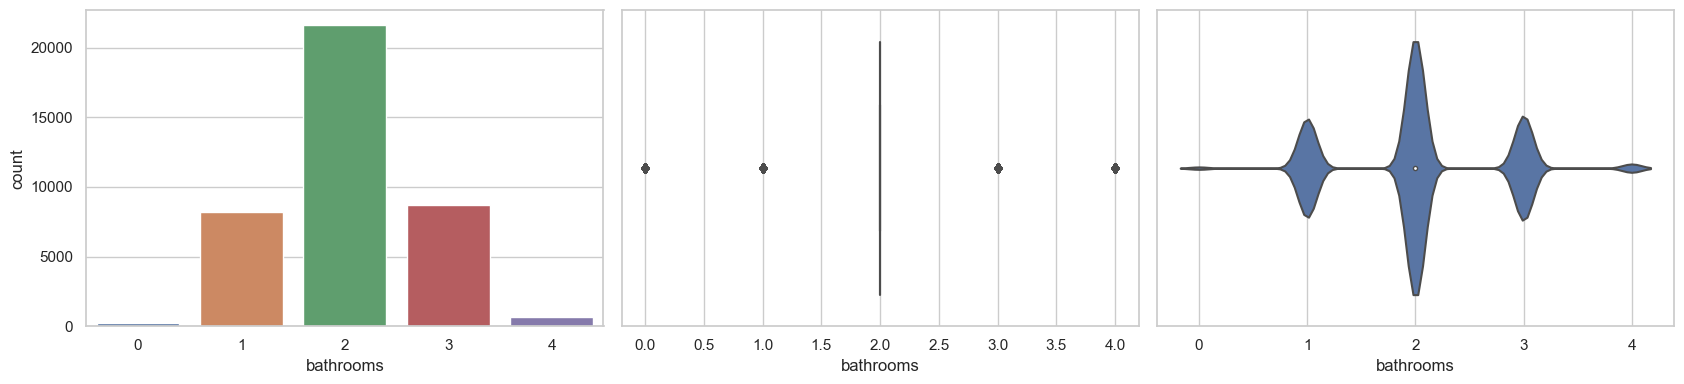

BEDROOMS
count of unique: 5
0      296
1     1921
4     8888
2    11128
3    17172
Name: bedrooms, dtype: int64


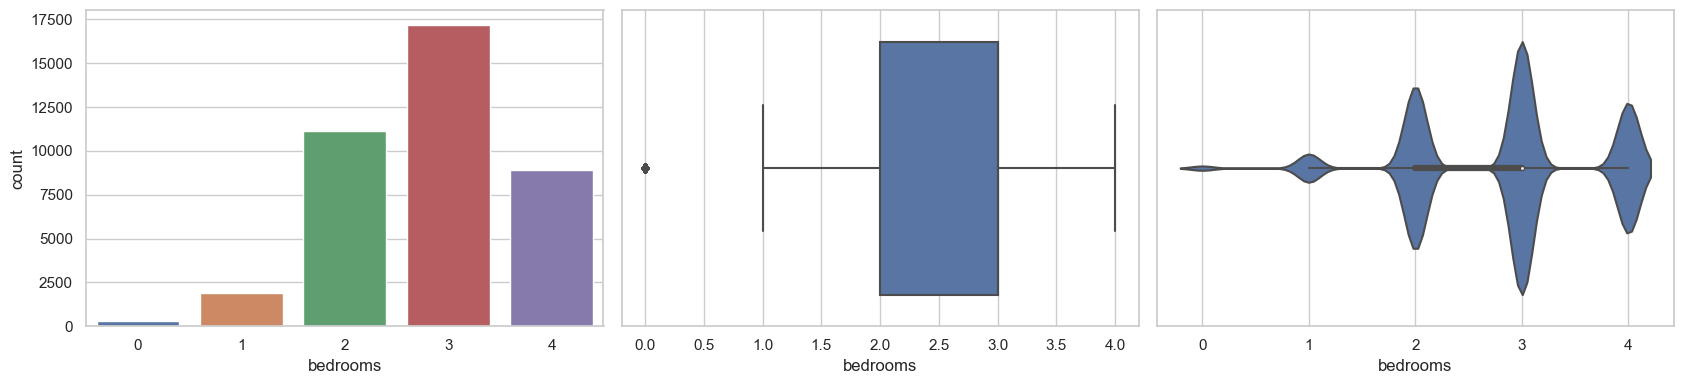

FULLBATHCNT
count of unique: 4
4      692
1     8197
3     8681
2    21835
Name: fullbathcnt, dtype: int64


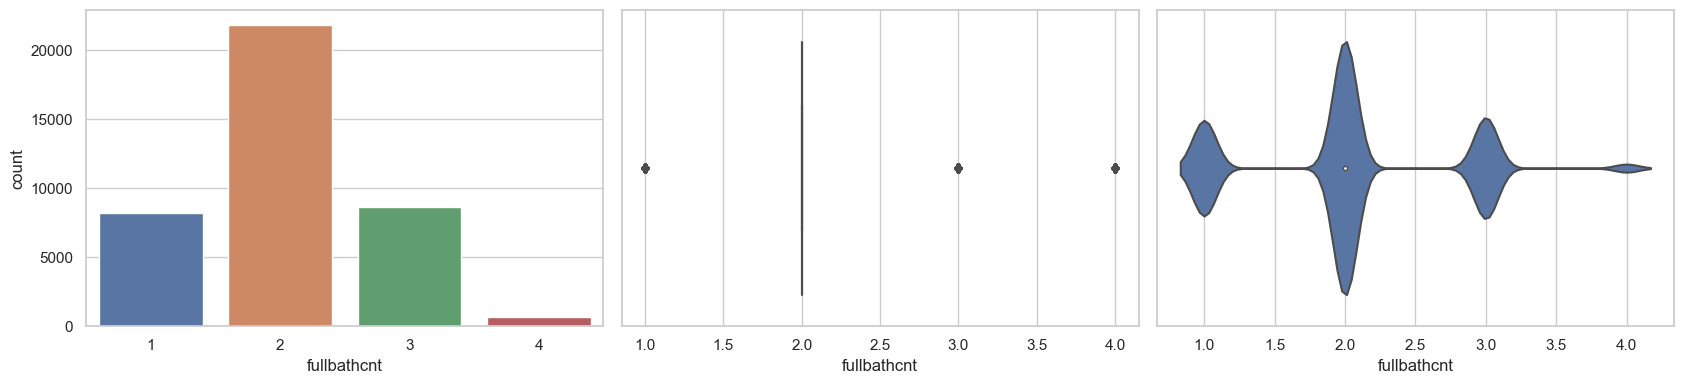

REGIONIDCITY
count of unique: 174
36078       1
10815       2
13311       2
38980       2
6822        2
         ... 
54311    1020
5534     1035
25218    1351
46298    1408
12447    8736
Name: regionidcity, Length: 174, dtype: int64


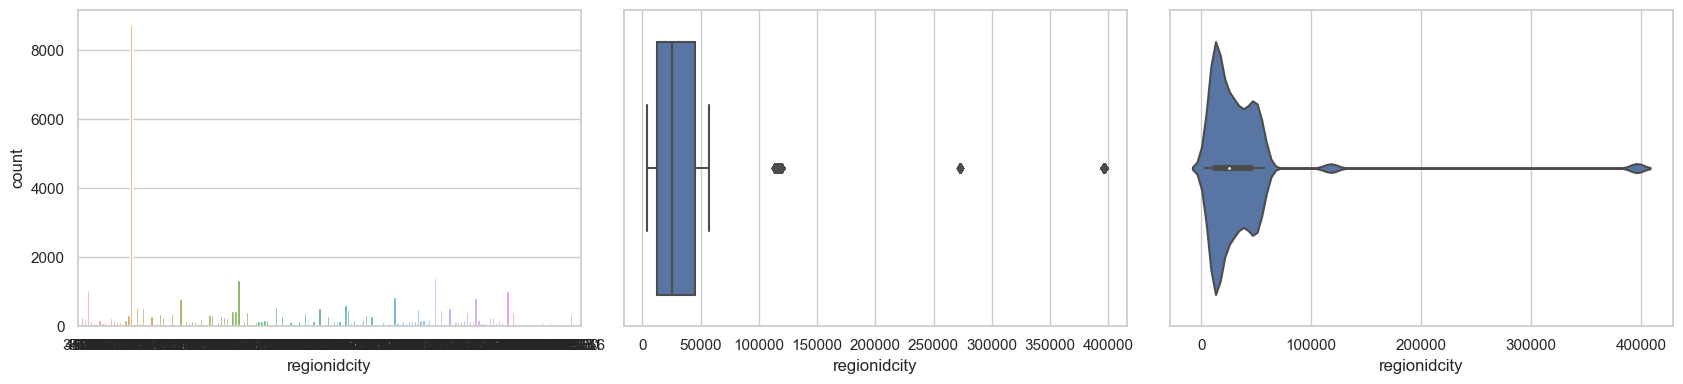

REGIONIDCOUNTY
count of unique: 3
2061     3231
1286    10464
3101    25710
Name: regionidcounty, dtype: int64


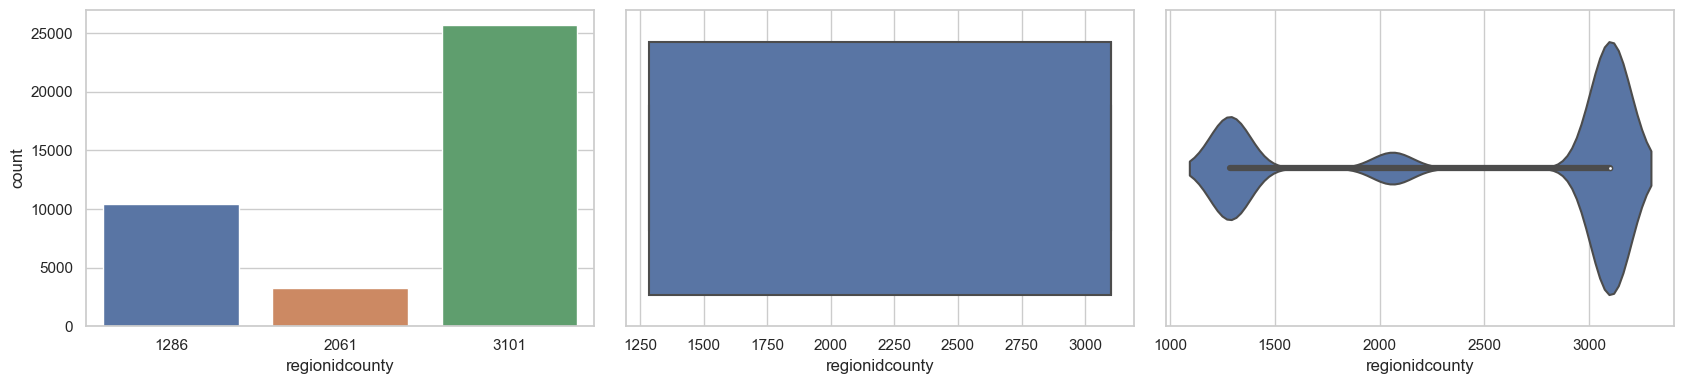

REGIONIDZIP
count of unique: 387
97111      1
96329      1
96467      1
97092      1
96500      1
        ... 
96974    341
96993    345
96987    406
97318    408
97319    415
Name: regionidzip, Length: 387, dtype: int64


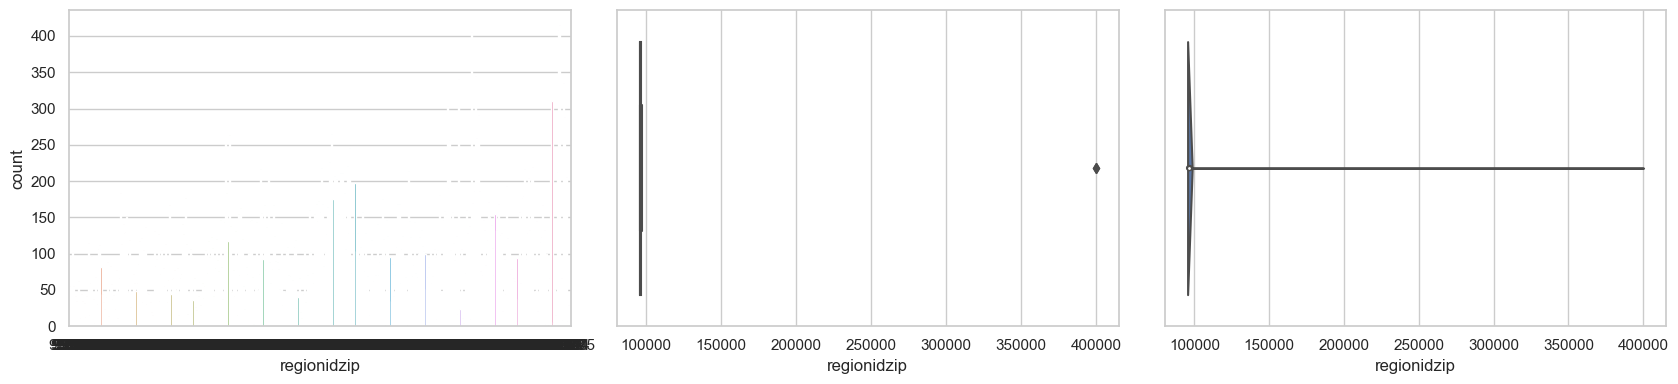

ROOMCNT
count of unique: 13
1         1
12        1
11        3
2         3
10       30
3        90
9       361
4       805
8      1440
5      1764
7      2168
6      2549
0     30190
Name: roomcnt, dtype: int64


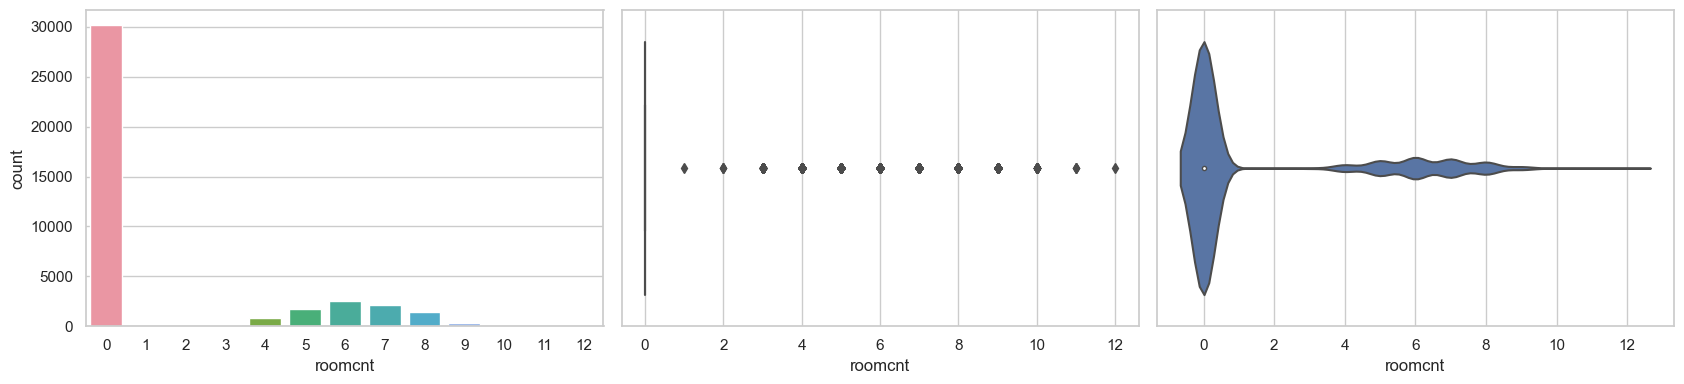

UNITCNT
count of unique: 5
6        1
3      133
4      140
2      809
1    38322
Name: unitcnt, dtype: int64


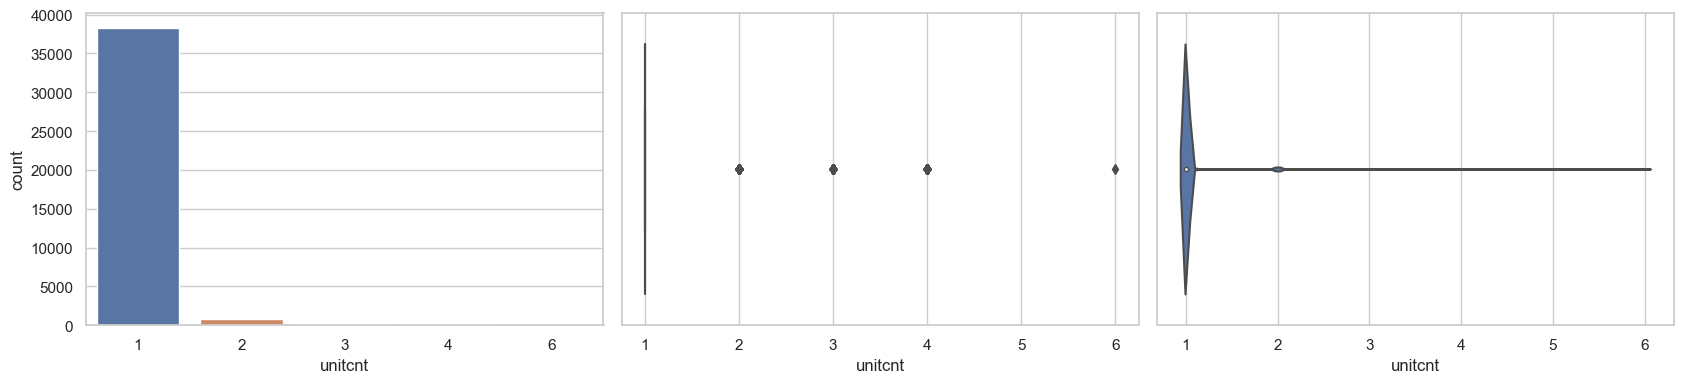

YEAR_BUILT
count of unique: 107
2016       1
1917      19
1916      22
1934      25
2015      26
        ... 
1954     878
1950     882
1973     903
1989     969
1955    1106
Name: year_built, Length: 107, dtype: int64


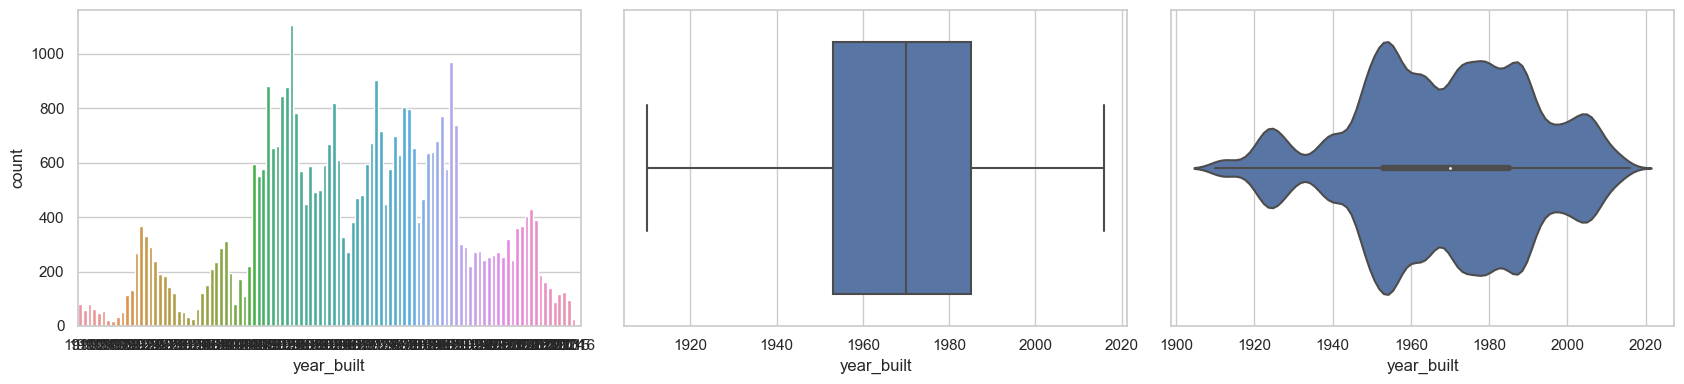

ASSESSMENTYEAR
count of unique: 1
2016    39405
Name: assessmentyear, dtype: int64


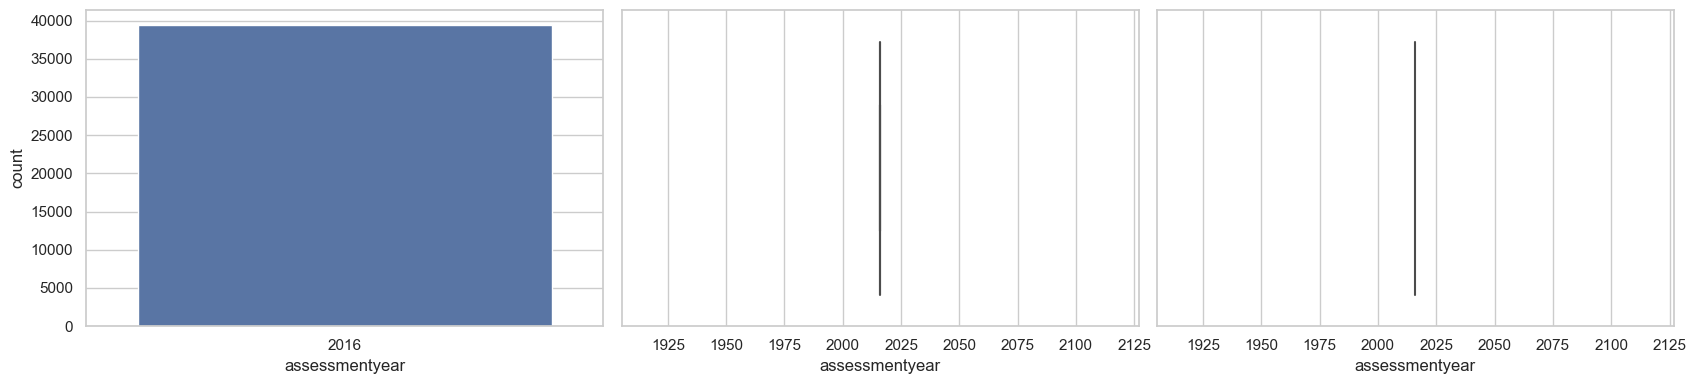

In [7]:
plot_categorical_and_continuous_vars()

'Visual successfully saved in folder: 01_univariate_stats_viz'

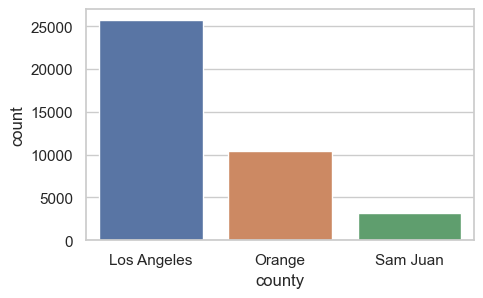

In [8]:
plt.figure(figsize = (5,3))
sns.countplot(data= train, x="county")

fig = plt.gcf()

# save visual to file path
explore_.save_visuals(fig=fig, viz_name="county_univarate", folder_name= 1)


**Univariate for other continuous variables**

SQR_FEET
count of unique: 2938


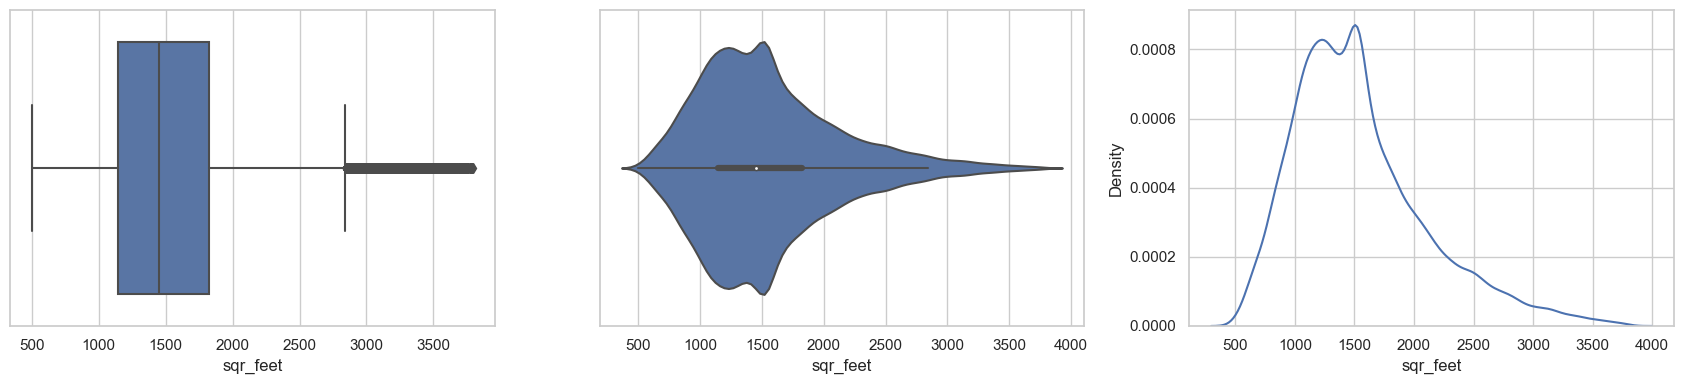

TAX_VALUE
count of unique: 27757


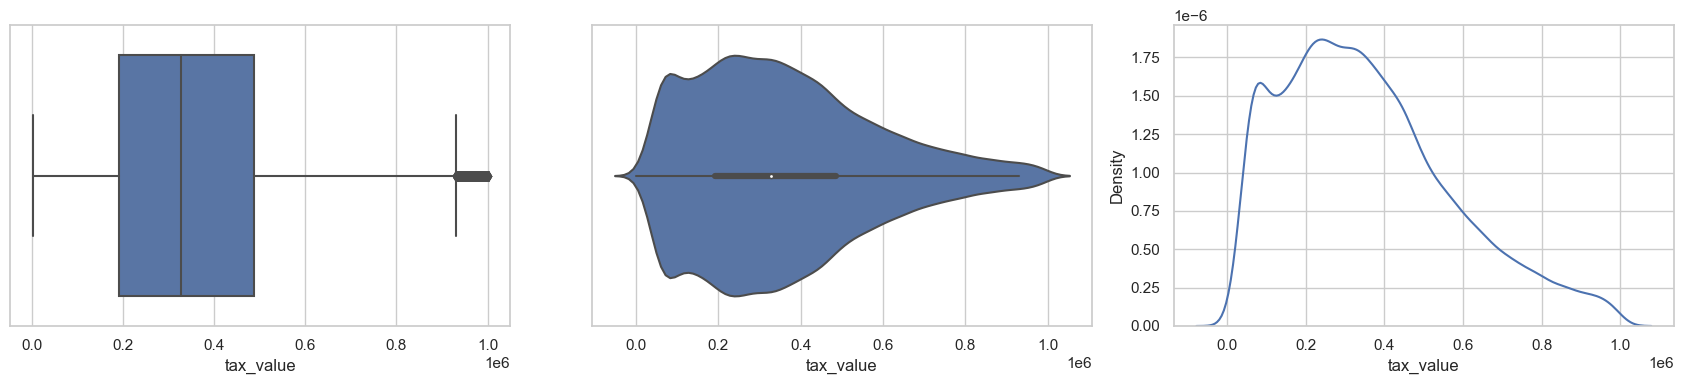

TAX_AMOUNT
count of unique: 38171


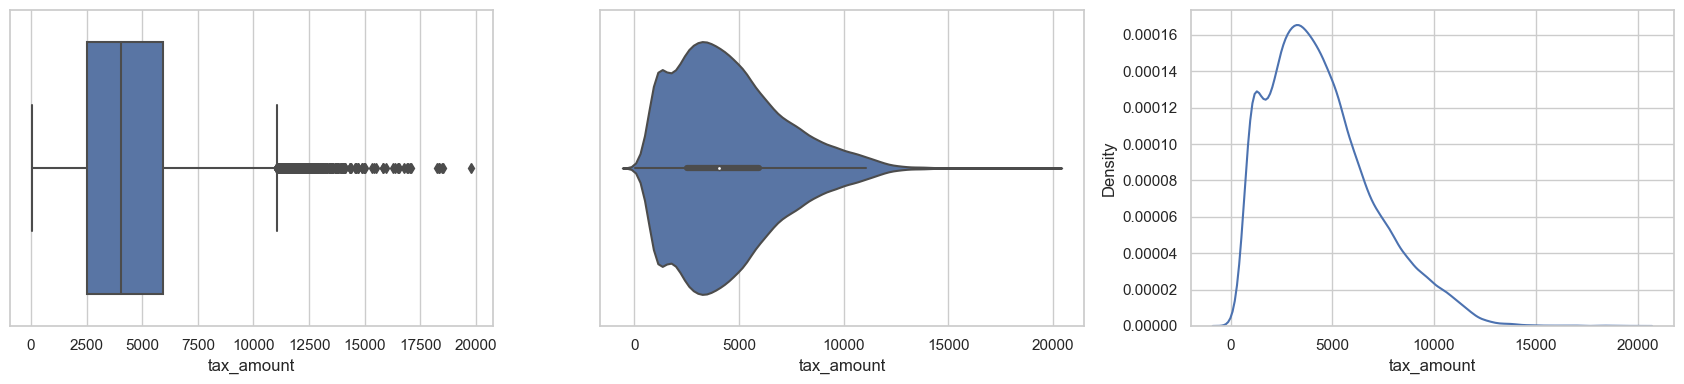

In [9]:
# # Get a sample of the continious columns to fro ploting
train_continious = train[["sqr_feet", "tax_value", "tax_amount"]]

# plot all the low category columns to see the distributions
for col in train_continious.columns:
    print(col.upper())
    print("count of unique:",train[col].nunique())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.boxplot(data= train, x=col, ax=ax[0])
    sns.violinplot(data= train, x=col, ax=ax[1])
    sns.kdeplot(train, x=col, ax=ax[2])
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=col, folder_name= 1)

    plt.show()

**Take aways**
- `bathrooms` and `bedrooms`: looks to have some normality with some outliers.

- `county`: three categories with Los Angeles having the largest porpotion.
- `sqr_feet`: positive skew (right skew) with out liers starting at aout 3500 sqr feet.
- `tax_amount`: bimodal distribution with two picks (modes) and contains outliers starting at about 12000 dollars.
- `tax_value`: bimodal distribution with two picks (modes) and contains outliers starting at about 100000 dollars. (this may be do to the `0` values in bedroom and bathrooms)
- `year built`: have some normality shape to it and some outliers . its pick is aroung the 1955.

## Bivariate statistics

In [10]:
# separeate discrete from continuous variables
continuous_col = []
categorical_col = []
target = "tax_value"

for col in train.columns:
    if col == target:
        pass
    elif train[col].dtype == "O":
        categorical_col.append(col)

    else:
        if len(train[col].unique()) < 20: #making anything with less than 4 unique values a catergorical value
            categorical_col.append(col)
        else:
            continuous_col.append(col)
            
categorical_col, continuous_col

(['bathrooms',
  'bedrooms',
  'county',
  'fullbathcnt',
  'propertycountylandusecode',
  'regionidcounty',
  'roomcnt',
  'unitcnt',
  'assessmentyear',
  'transactiondate',
  'propertylandusedesc'],
 ['parcelid',
  'sqr_feet',
  'latitude',
  'longitude',
  'lotsizesquarefeet',
  'rawcensustractandblock',
  'regionidcity',
  'regionidzip',
  'year_built',
  'structuretaxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'tax_amount',
  'censustractandblock',
  'logerror'])

**categorical variables**

In [11]:
# Get a sample of the categorical columns for ploting
train_continious = train[categorical_col]

# pairs of combinations
categorical_comb = list(itertools.product(categorical_col, ["tax_value"]))
categorical_comb

[('bathrooms', 'tax_value'),
 ('bedrooms', 'tax_value'),
 ('county', 'tax_value'),
 ('fullbathcnt', 'tax_value'),
 ('propertycountylandusecode', 'tax_value'),
 ('regionidcounty', 'tax_value'),
 ('roomcnt', 'tax_value'),
 ('unitcnt', 'tax_value'),
 ('assessmentyear', 'tax_value'),
 ('transactiondate', 'tax_value'),
 ('propertylandusedesc', 'tax_value')]

BATHROOMS VS TAX_VALUE


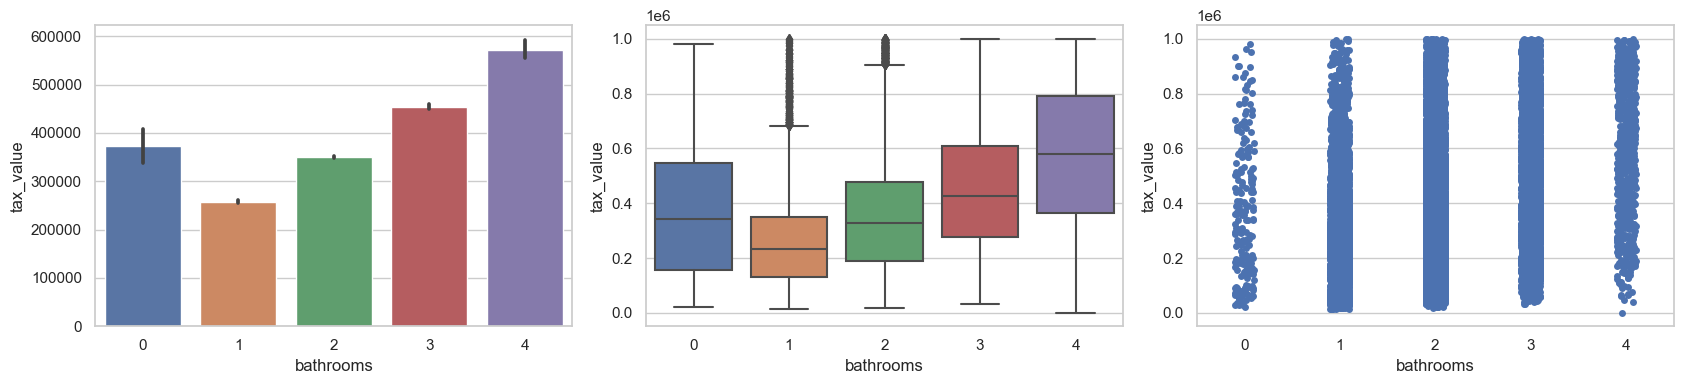

BEDROOMS VS TAX_VALUE


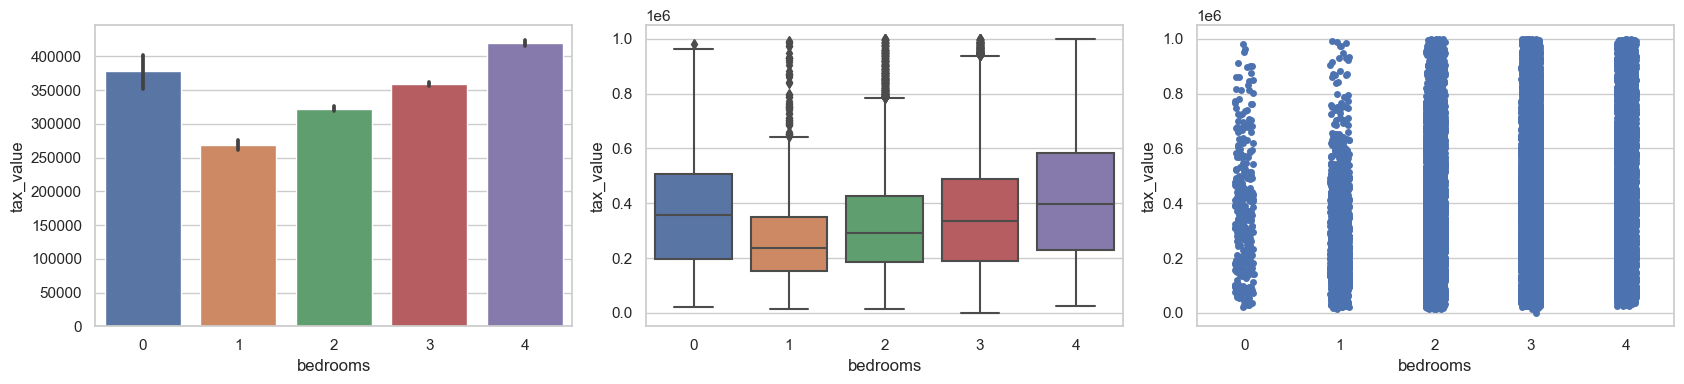

COUNTY VS TAX_VALUE


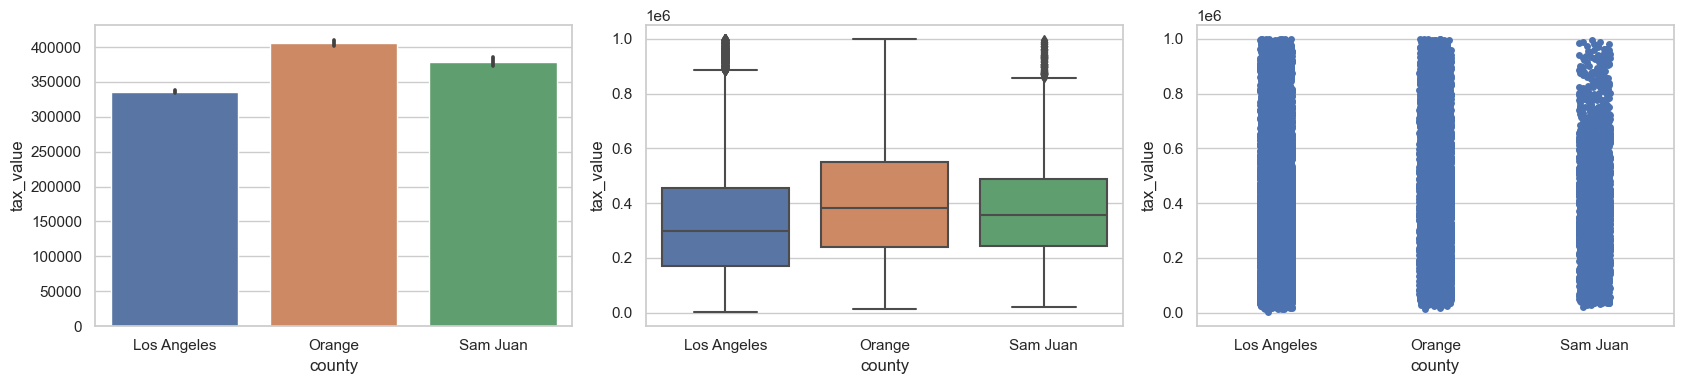

FULLBATHCNT VS TAX_VALUE


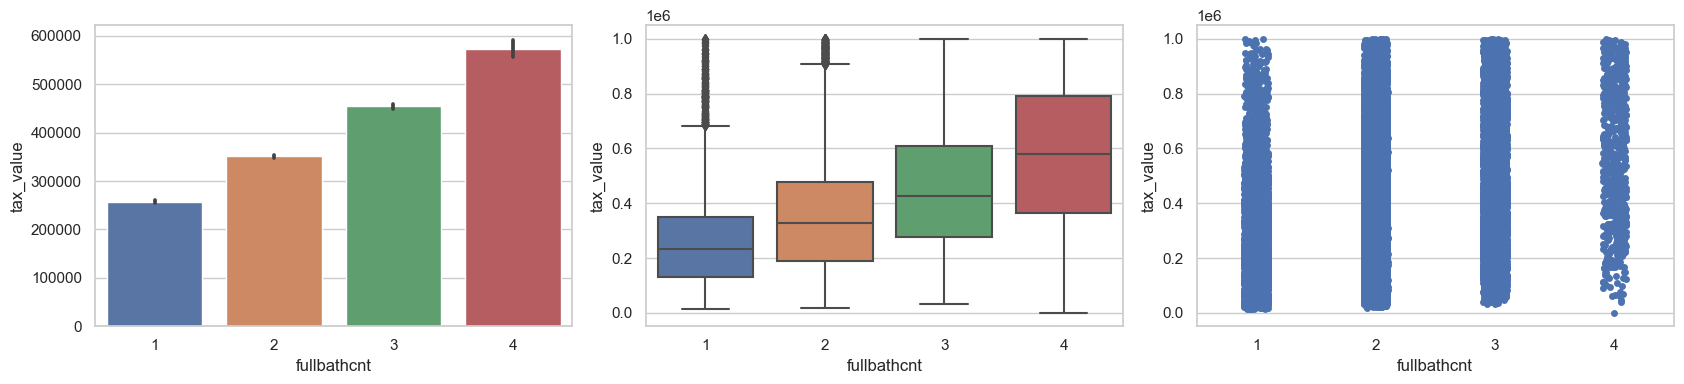

PROPERTYCOUNTYLANDUSECODE VS TAX_VALUE


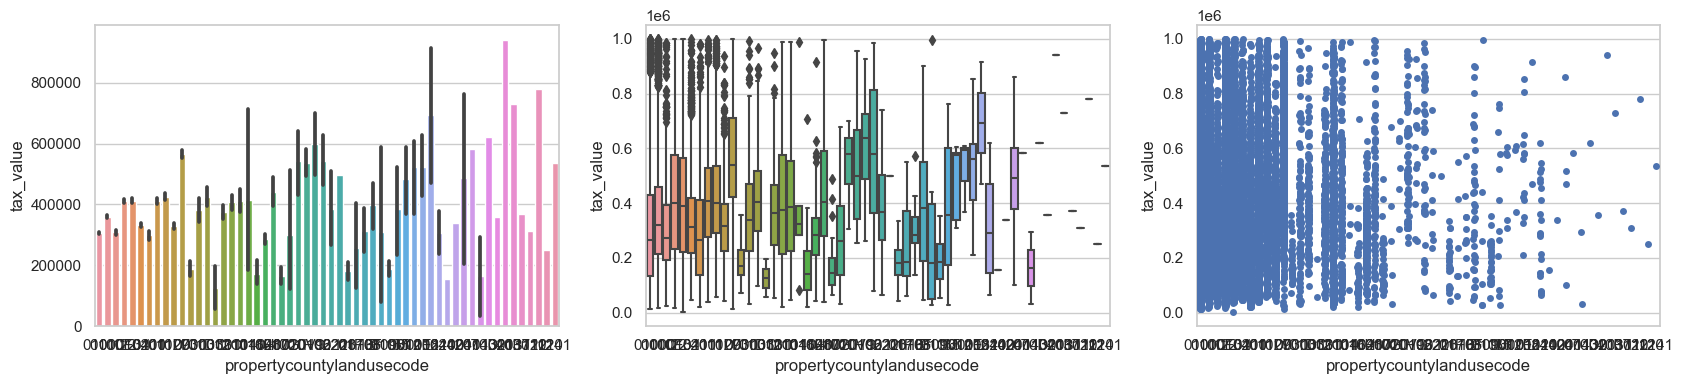

REGIONIDCOUNTY VS TAX_VALUE


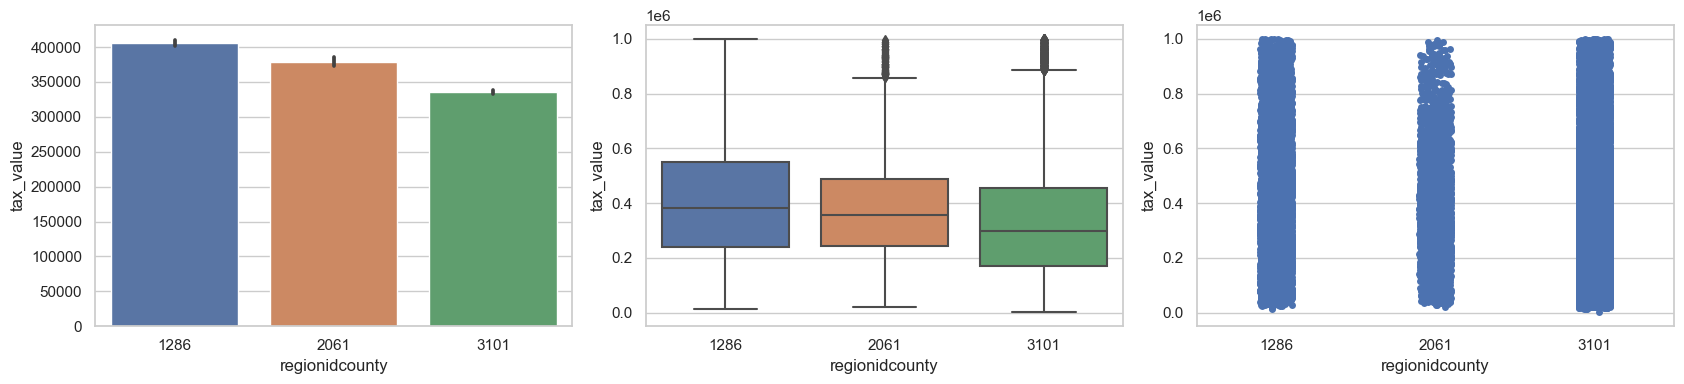

ROOMCNT VS TAX_VALUE


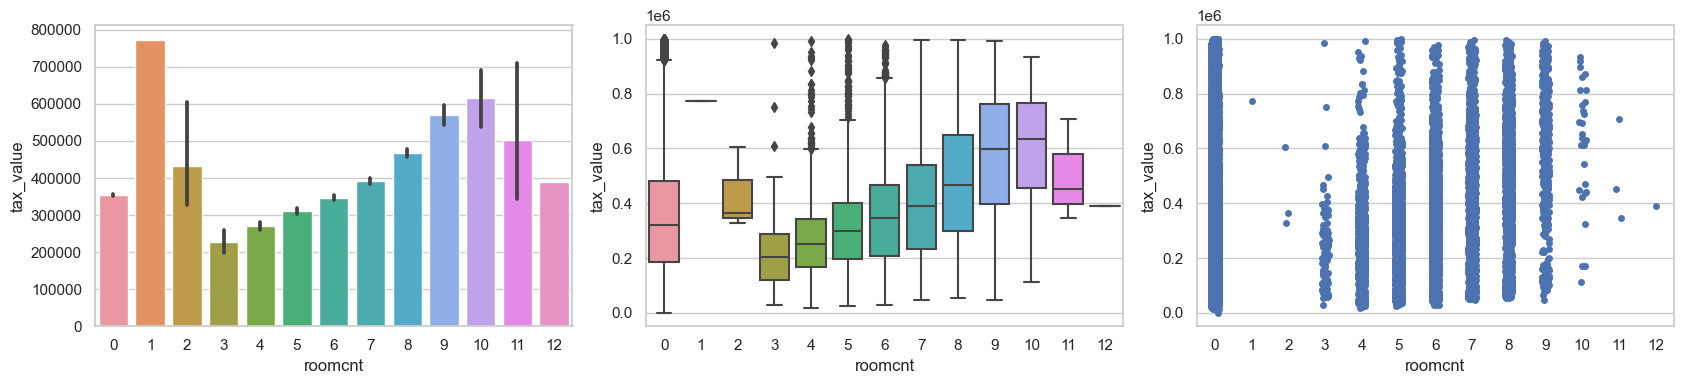

UNITCNT VS TAX_VALUE


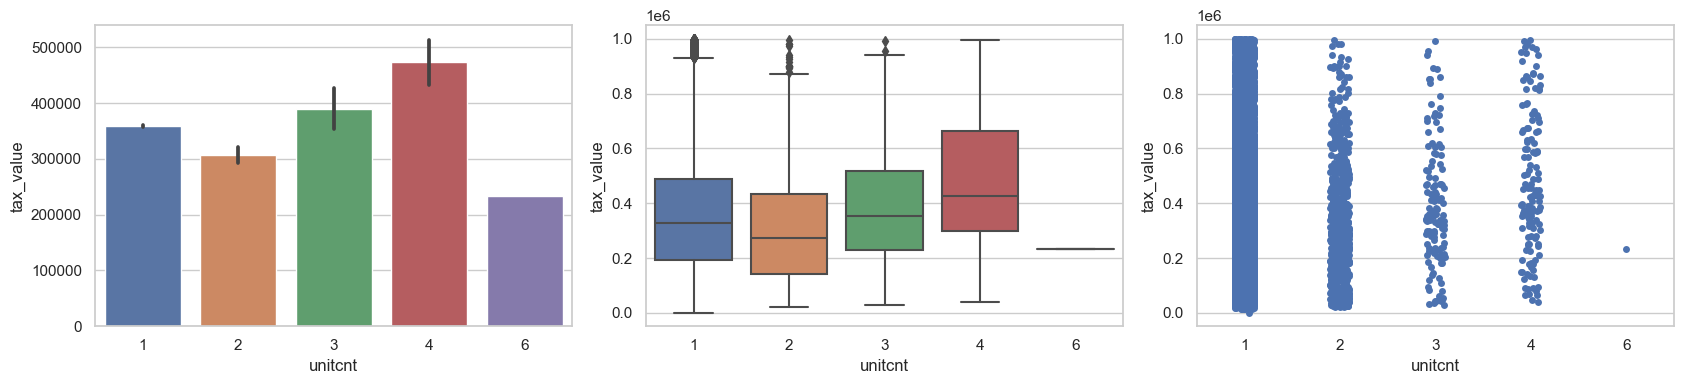

ASSESSMENTYEAR VS TAX_VALUE


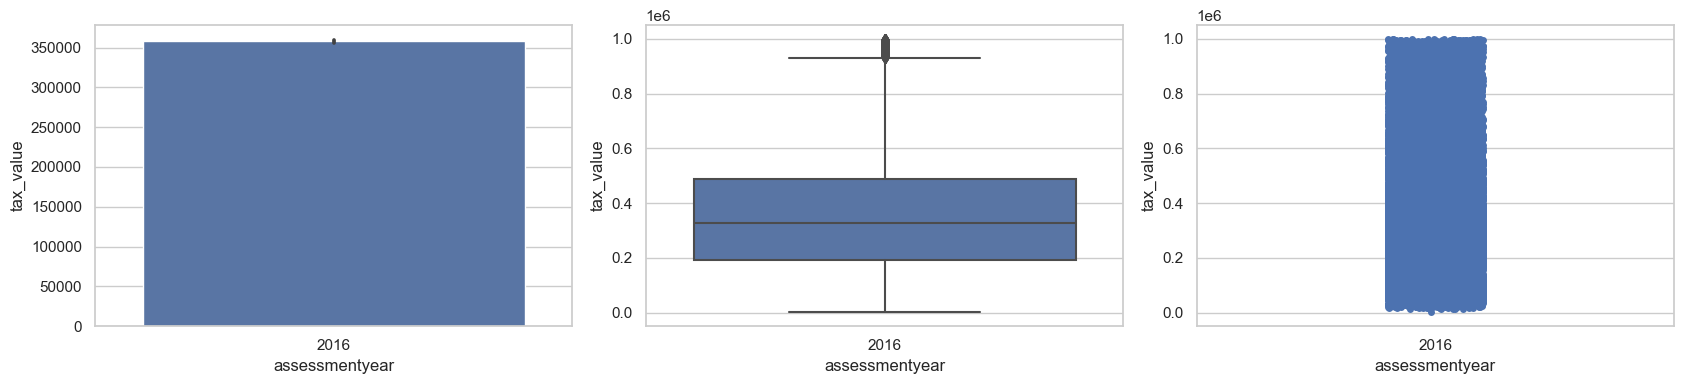

TRANSACTIONDATE VS TAX_VALUE


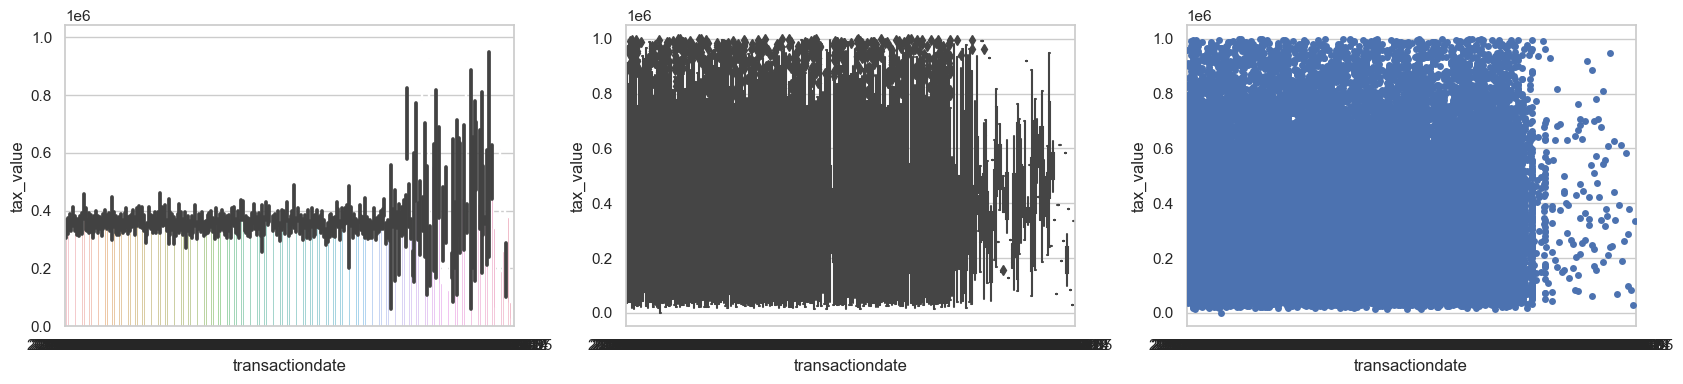

PROPERTYLANDUSEDESC VS TAX_VALUE


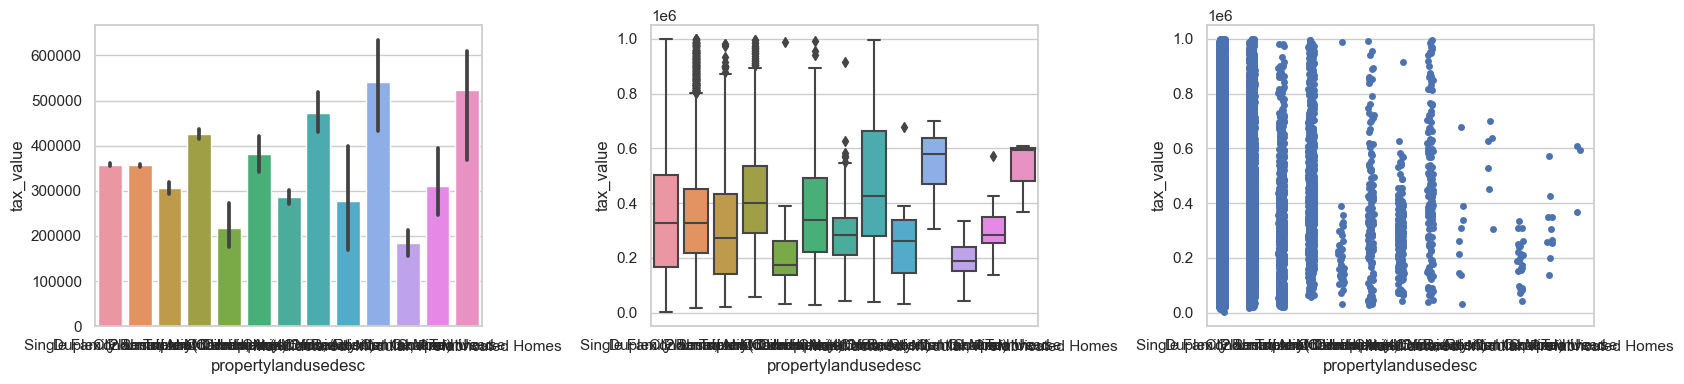

In [15]:
# Get a sample of the continious columns to fro ploting
train_full_sample = train[train.columns]

# plot all the low category columns to see the distributions
for col in categorical_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
    sns.barplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.boxplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.stripplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()


**Take aways**
- `bathrooms_vs_tax_value`: `0` bathrooms has the lowest average while `5.5` have the highers average. `5 and 6` bathroom counts have the higers tax value.
- `bedrooms_vs_tax_value`: `0` bedrooms has the lowest average while `5` have the highers average.`5, 6and 7` bedroom counts have the higers tax value.
- `county_vs_tax_value`: `orange county` have a sighly higer average than the other counties but it's not by much. outliers might be affecting these counties. `Orange county` have the higers tax value.

**Continuous variables**

In [16]:
# Get a sample of the categorical columns for ploting
train_continious = train[continuous_col]

# pairs of comninmations
continuous_comb = list(itertools.product(continuous_col, ["tax_value"]))
continuous_comb

[('parcelid', 'tax_value'),
 ('sqr_feet', 'tax_value'),
 ('latitude', 'tax_value'),
 ('longitude', 'tax_value'),
 ('lotsizesquarefeet', 'tax_value'),
 ('rawcensustractandblock', 'tax_value'),
 ('regionidcity', 'tax_value'),
 ('regionidzip', 'tax_value'),
 ('year_built', 'tax_value'),
 ('structuretaxvaluedollarcnt', 'tax_value'),
 ('landtaxvaluedollarcnt', 'tax_value'),
 ('tax_amount', 'tax_value'),
 ('censustractandblock', 'tax_value'),
 ('logerror', 'tax_value')]

PARCELID VS TAX_VALUE


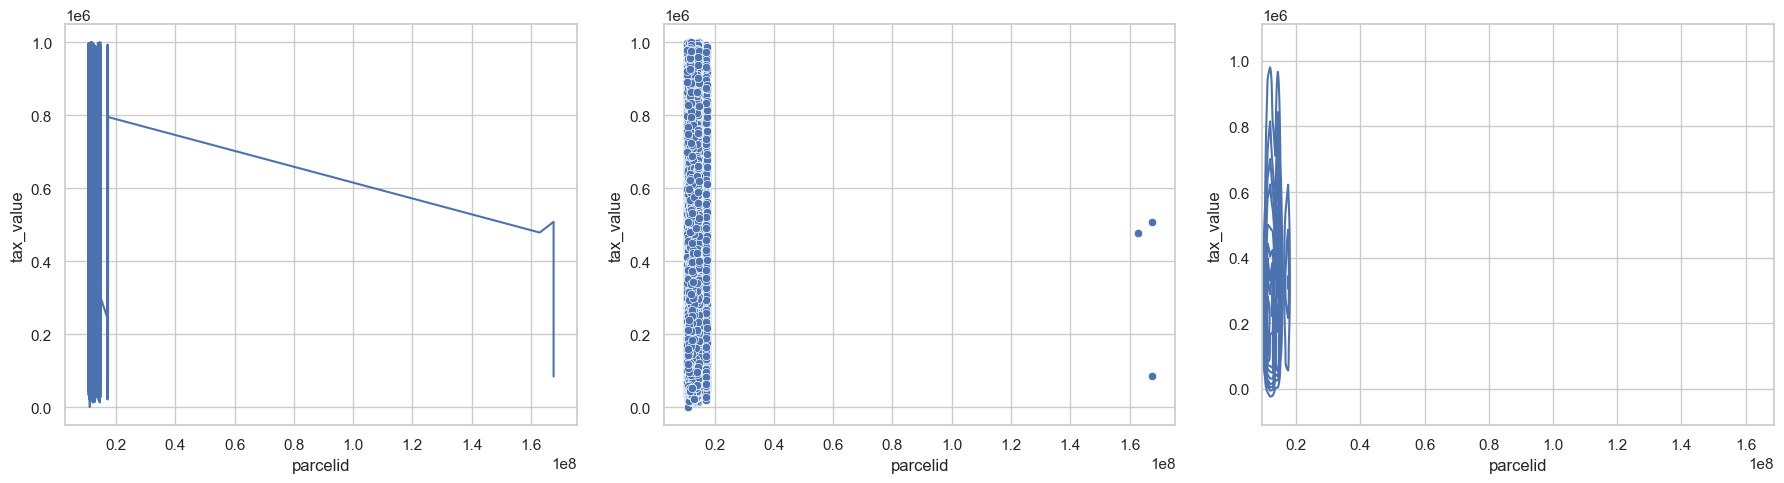

SQR_FEET VS TAX_VALUE


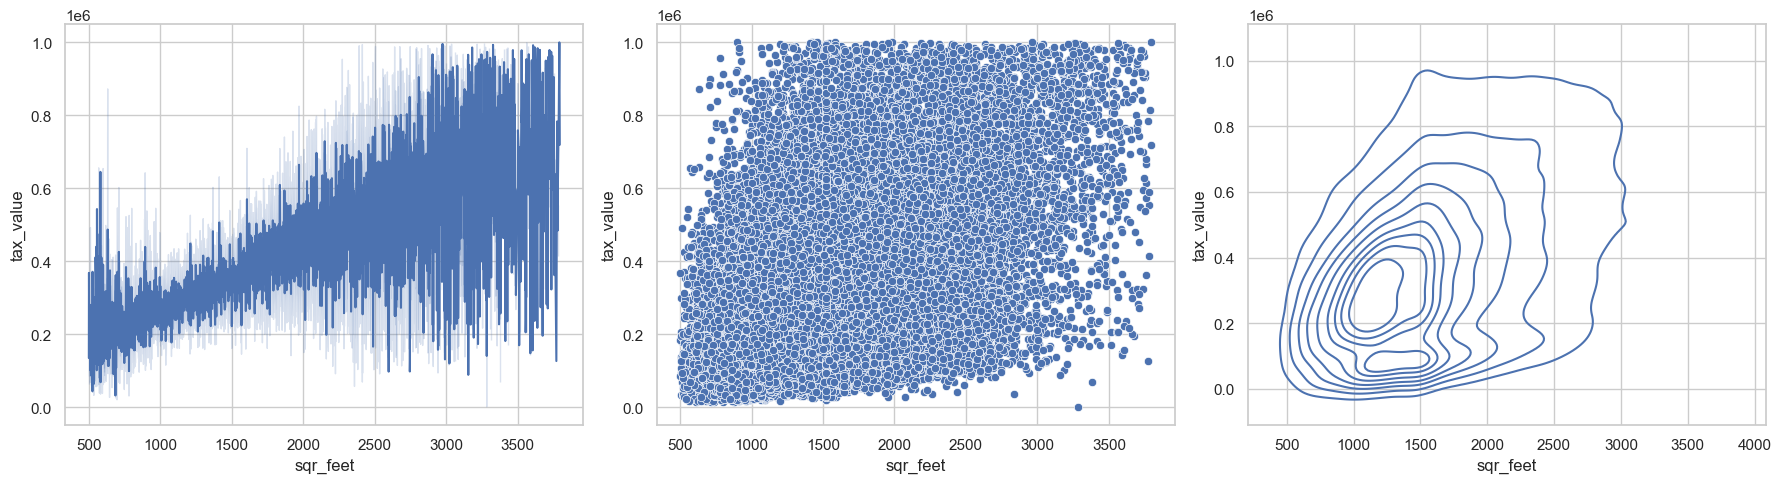

LATITUDE VS TAX_VALUE


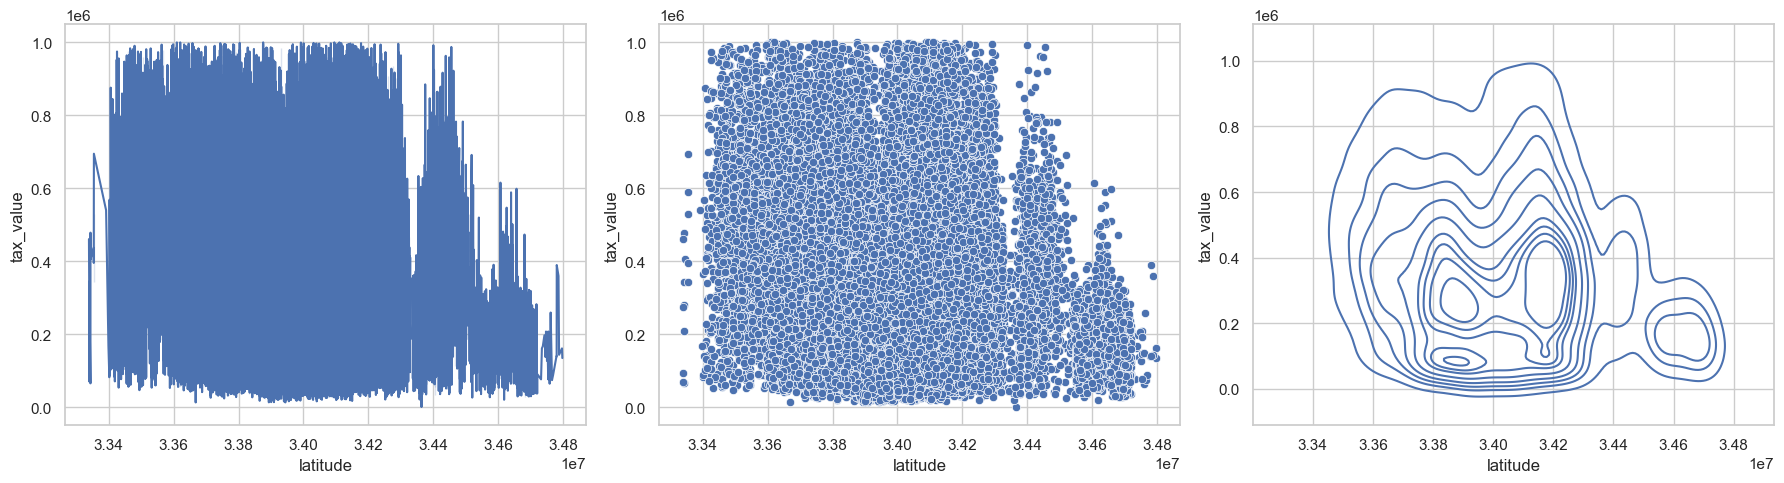

LONGITUDE VS TAX_VALUE


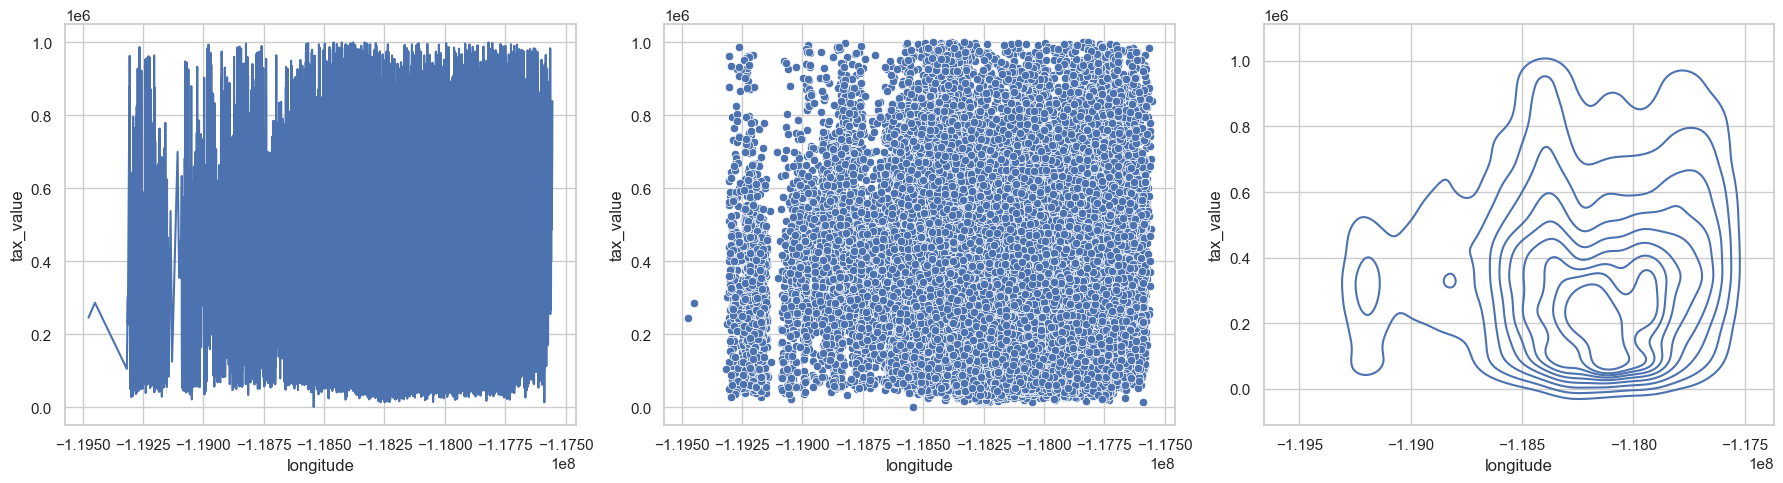

LOTSIZESQUAREFEET VS TAX_VALUE


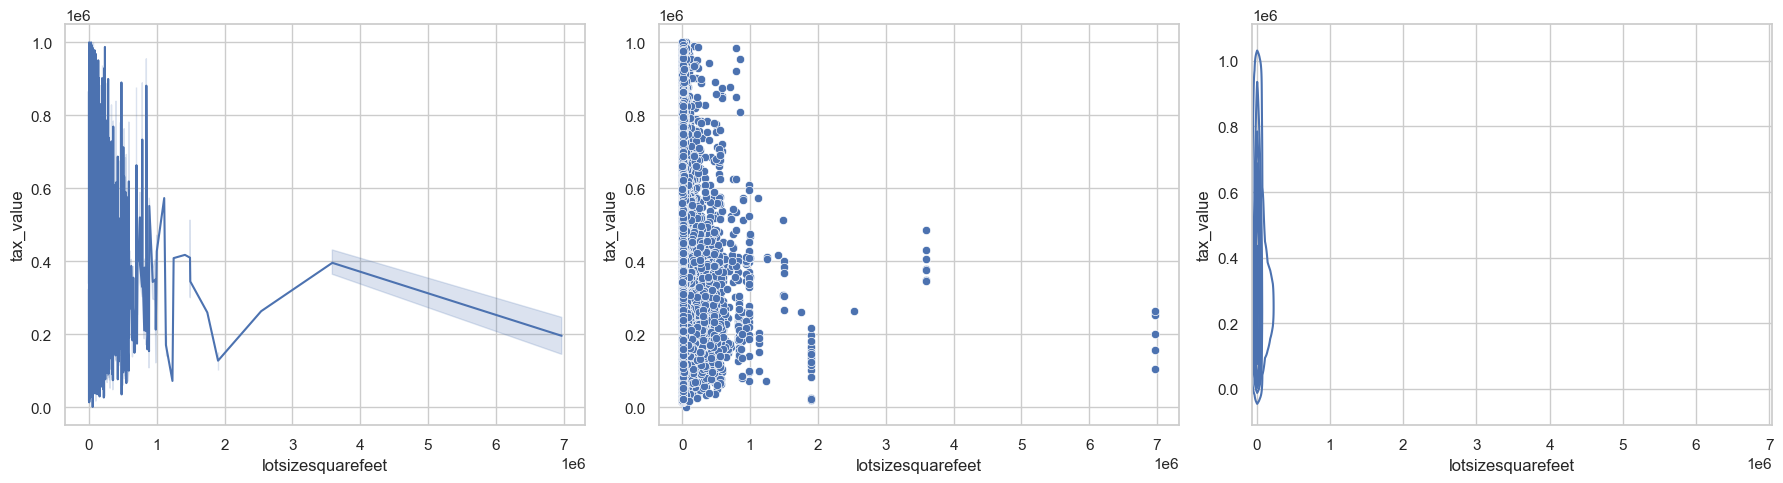

RAWCENSUSTRACTANDBLOCK VS TAX_VALUE


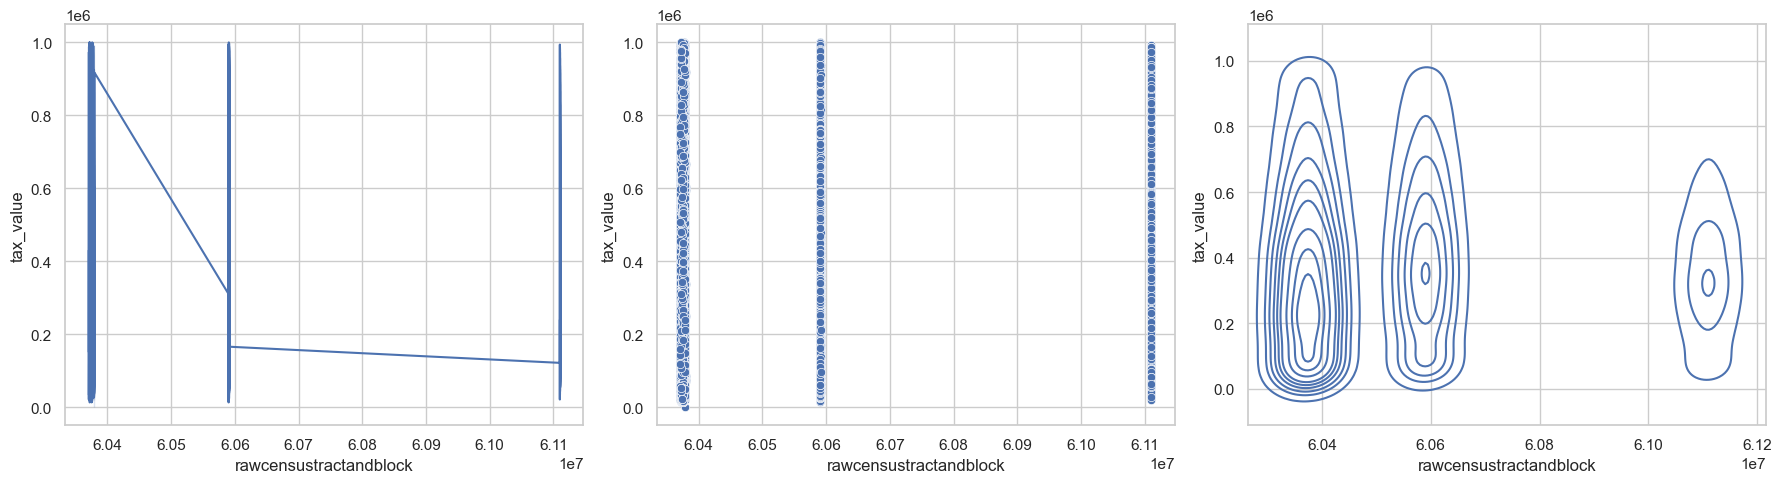

REGIONIDCITY VS TAX_VALUE


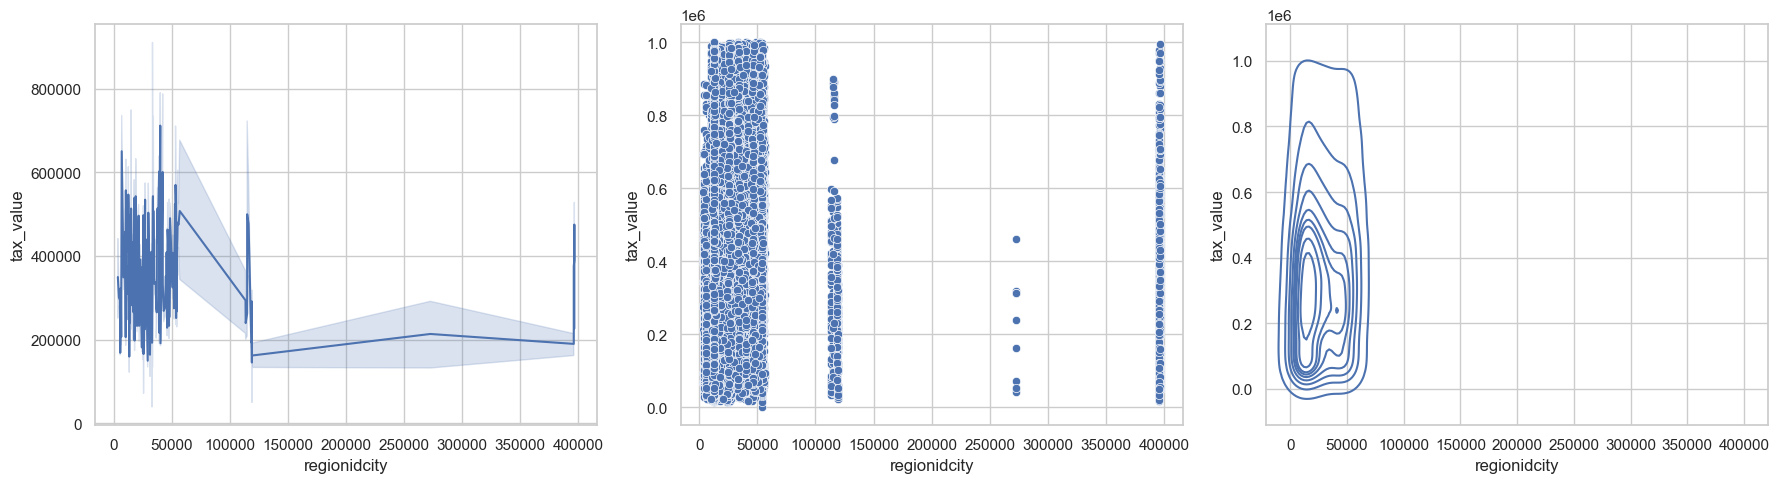

REGIONIDZIP VS TAX_VALUE


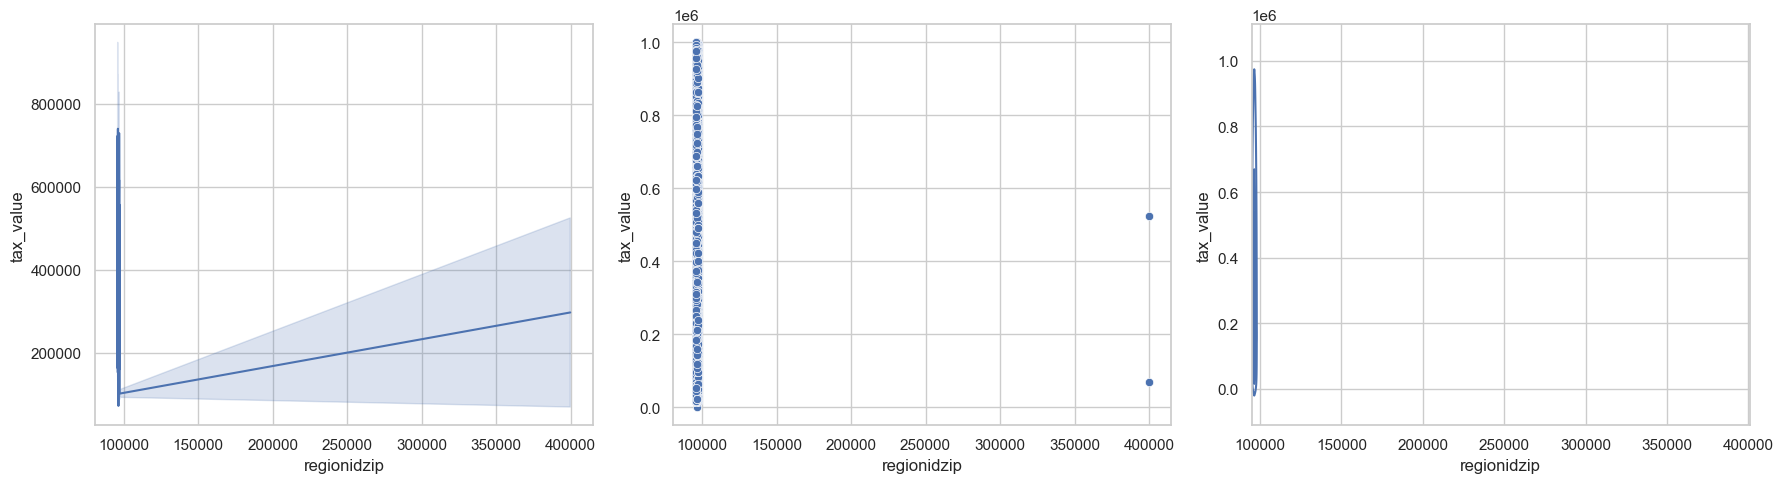

YEAR_BUILT VS TAX_VALUE


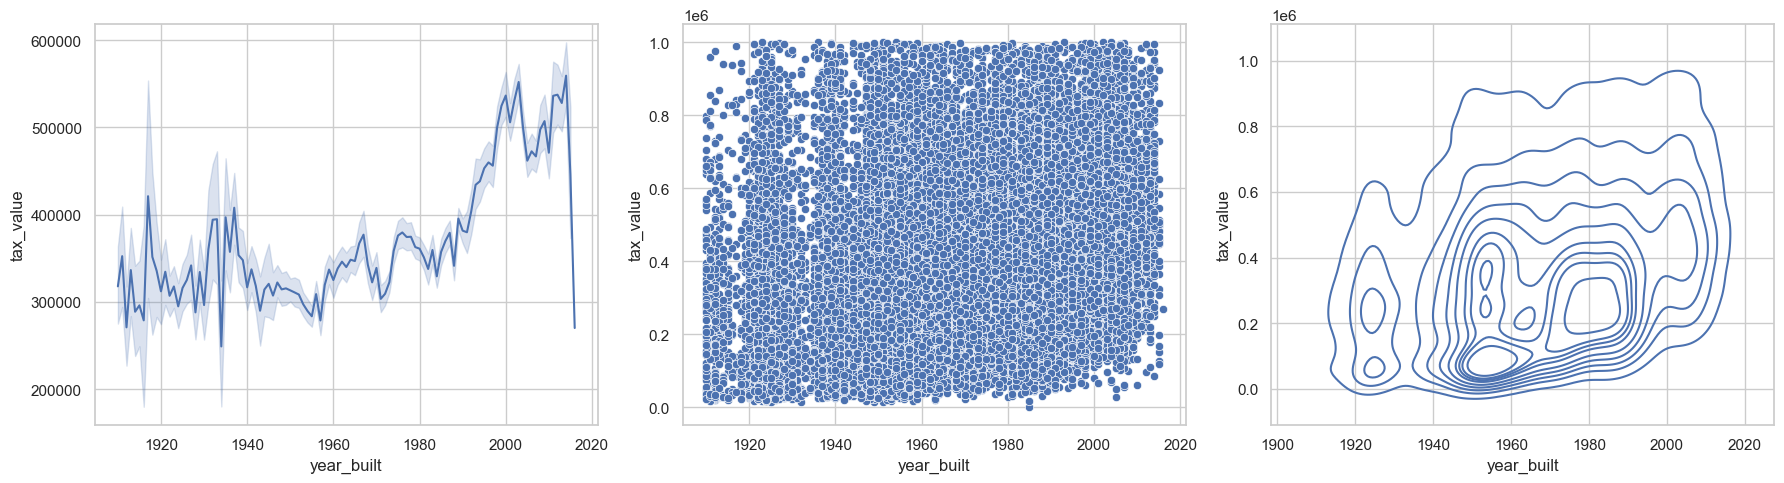

STRUCTURETAXVALUEDOLLARCNT VS TAX_VALUE


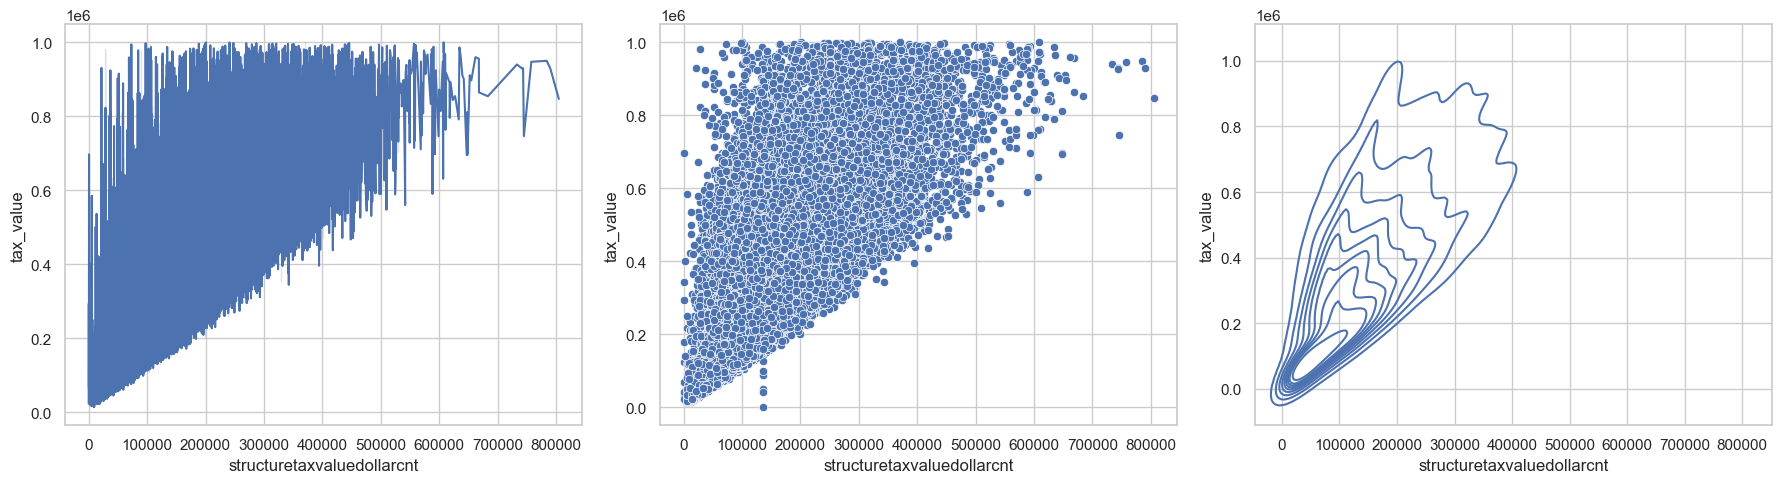

LANDTAXVALUEDOLLARCNT VS TAX_VALUE


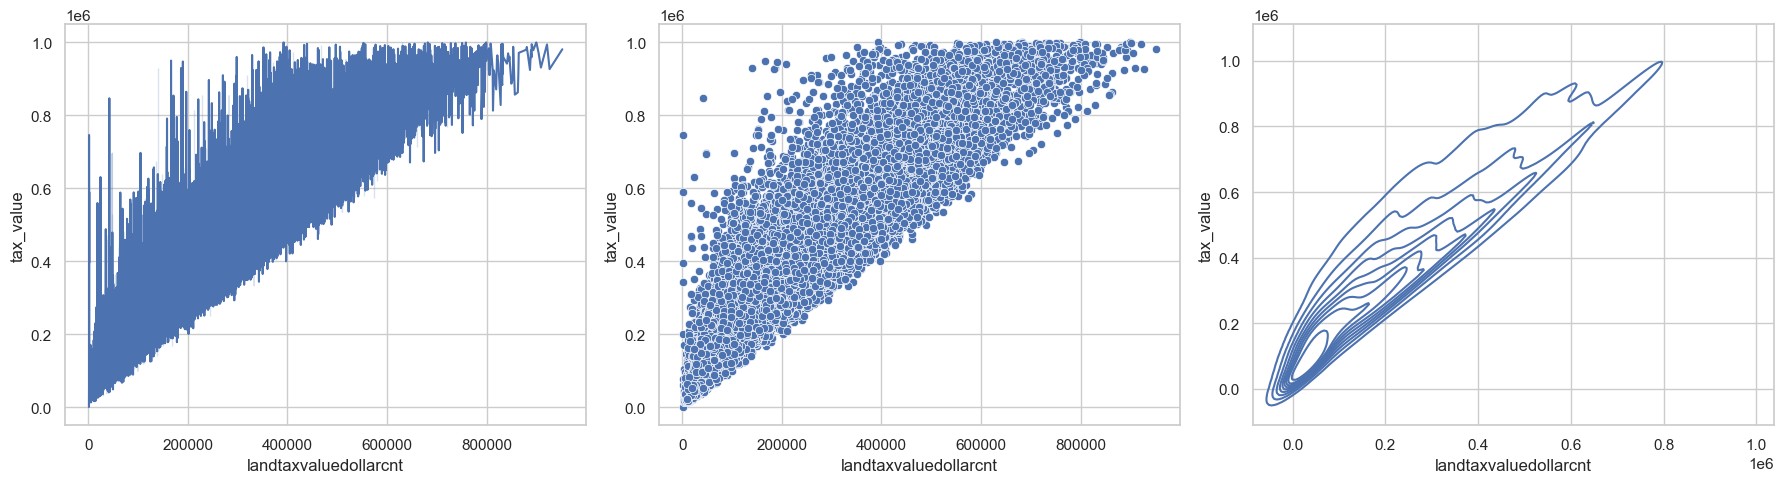

TAX_AMOUNT VS TAX_VALUE


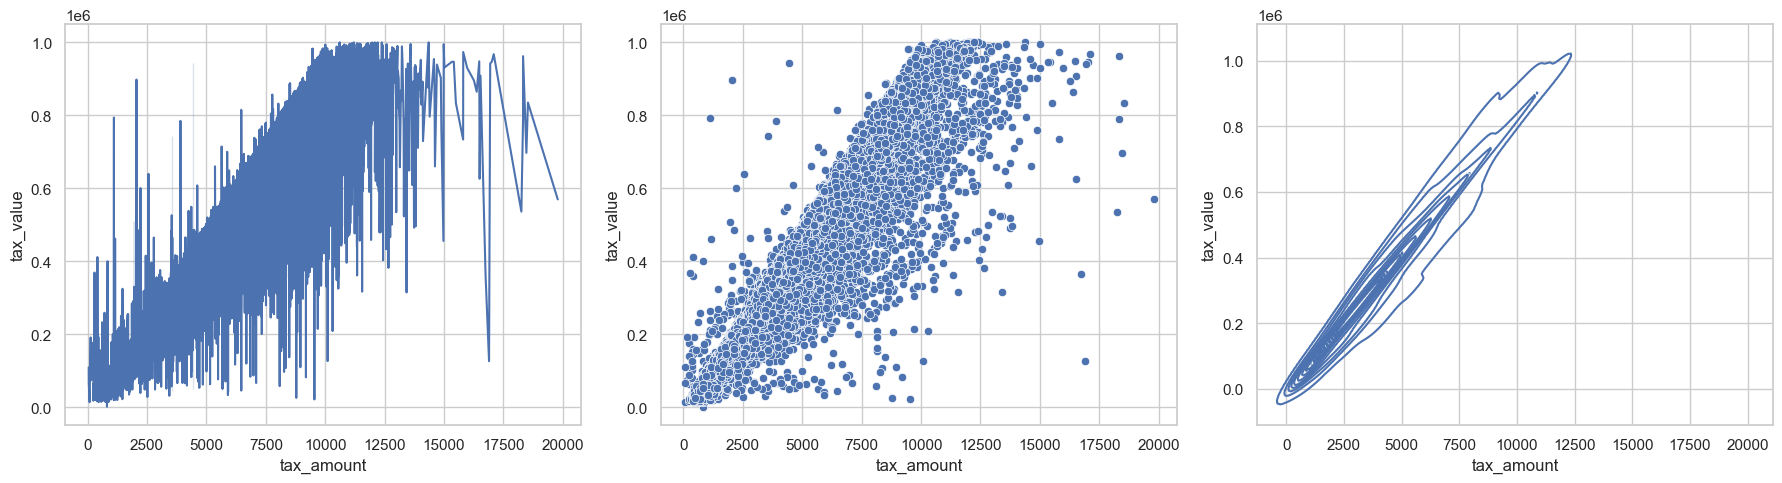

CENSUSTRACTANDBLOCK VS TAX_VALUE


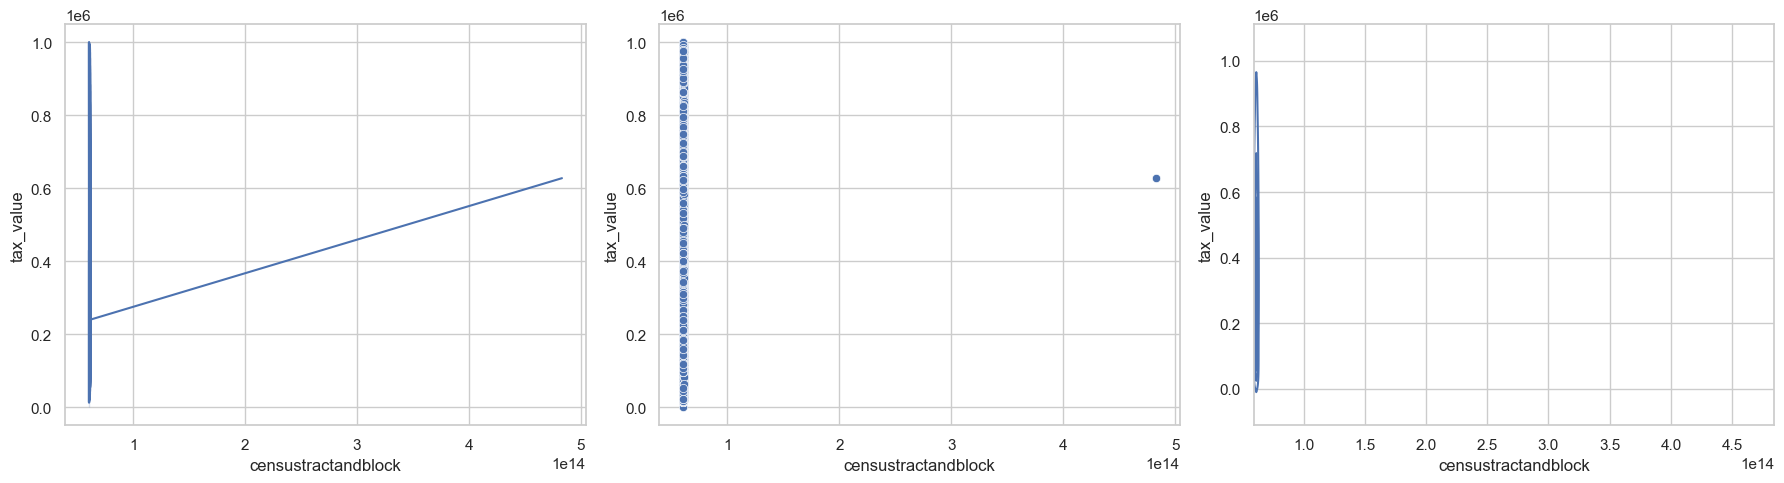

LOGERROR VS TAX_VALUE


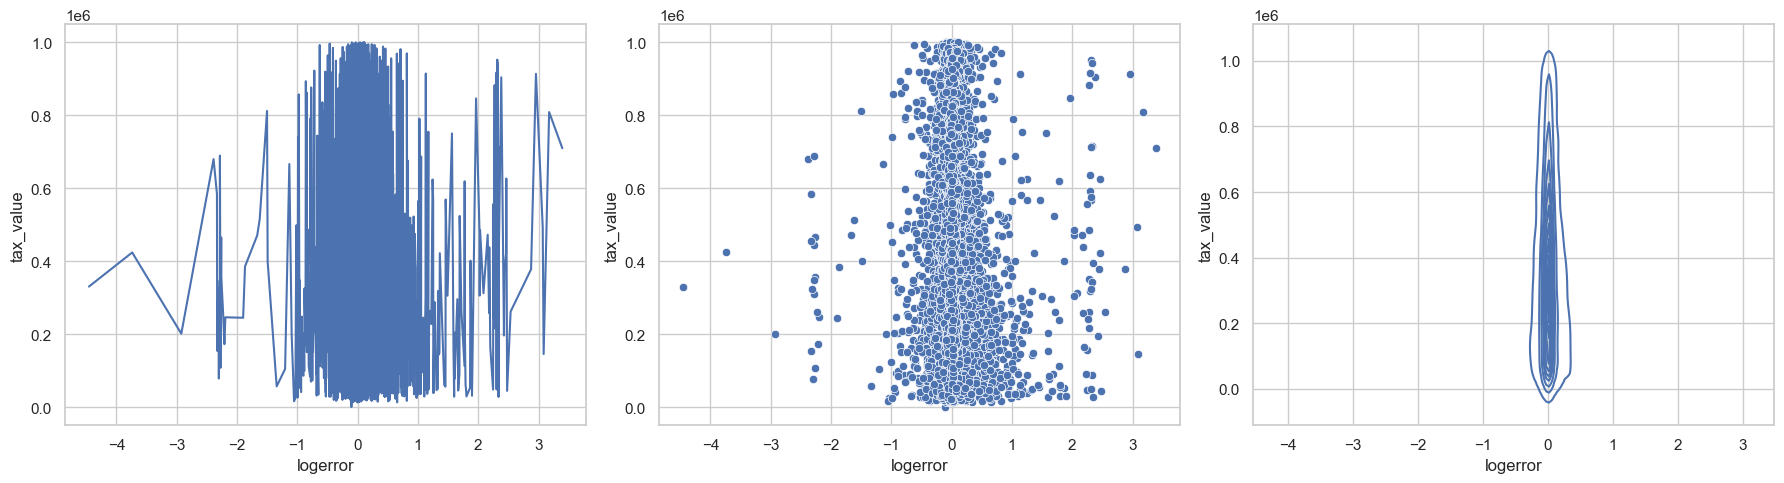

In [17]:
# plot all the low category columns to see the distributions

for col in continuous_comb:
    print(col[0].upper(), "VS", col[1].upper())
    # plots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))   

    sns.lineplot(data= train, x=col[0] , y=col[1], ax= ax[0])
    sns.scatterplot(data= train, x=col[0] , y=col[1], ax= ax[1])
    sns.kdeplot(data= train, x=col[0] , y=col[1], ax= ax[2])
    
    plt.tight_layout()
    
    # save visual to file path
    explore_.save_visuals(fig=fig, viz_name=f"{col[0]}_vs_{col[1]}", folder_name= 2)
    
    plt.show()


**Take aways**
- `sqr_feet_vs_tax_value`: looks like a strong positive linear relationship between these two, but it is lossing the strength as it gains more sqare footage. this relationship looke to be strongest around 1500 sqr feet.
- `tax_amount_vs_tax_value`: looks like a moderate positive linear relationship between these two, but it is lossing the strength as it gains more dollars. this relationship looke to be strongest around 2500 dollars.
- `year)built_vs_tax_value`: looks like a positive linear relationship between these two. This relationship looke to be strongest around 1950 but countain miltiple little picks.

## Multivariate statistics

In [22]:
# get sample from training data
train_full_sample = train[train.columns].sample(10_000)
train_full_sample.head(2)

parcelid  bathrooms  bedrooms  sqr_feet       county  fullbathcnt  \
14698  14455279          3         4      2978       Orange            3   
22877  12218151          2         3      1242  Los Angeles            2   

       latitude  longitude  lotsizesquarefeet propertycountylandusecode  ...  \
14698  33482404 -117584710               7967                         1  ...   
22877  33946325 -118248935               3174                      0100  ...   

       year_built  structuretaxvaluedollarcnt  tax_value  assessmentyear  \
14698        2009                    569909.0   747547.0            2016   
22877        1964                     86550.0   140004.0            2016   

       landtaxvaluedollarcnt  tax_amount  censustractandblock  logerror  \
14698               177638.0    12251.30       60590320231049  0.024110   
22877                53454.0     2165.88       60375352003016 -0.021161   

       transactiondate        propertylandusedesc  
14698       2017-09-08  Single Family Residential  
22877       2017-04-03  Single Family Residential  

[2 rows x 26 columns]

In [34]:
# # plot
# grid = sns.PairGrid(train_full_sample, diag_sharey=False, hue="county")
# grid.map_upper(sns.scatterplot)
# grid.map_lower(sns.kdeplot)
# grid.map_diag(sns.kdeplot)

# # Get the current figure
# fig = plt.gcf()

# # save visual to file path
# explore_.save_visuals(fig=fig, viz_name= "pairplot_by_county", folder_name= 3)
# plt.show()

In [35]:
for cat in categorical_col[:-1]:
    # figure
    fig, ax = plt.subplots(nrows=1, ncols=len(continuous_col), figsize=(18,5))
    
    for i in range(len(continuous_col)):
        # plot
        sns.lineplot(data= train_full_sample, x= cat, y= continuous_col[i], hue="county", ax=ax[i])
        plt.tight_layout()
        
    # save visual
    explore_.save_visuals(fig=fig, viz_name=f"{cat}_vs_{continuous_col[i]}_by_county", folder_name= 3)
    plt.show
        

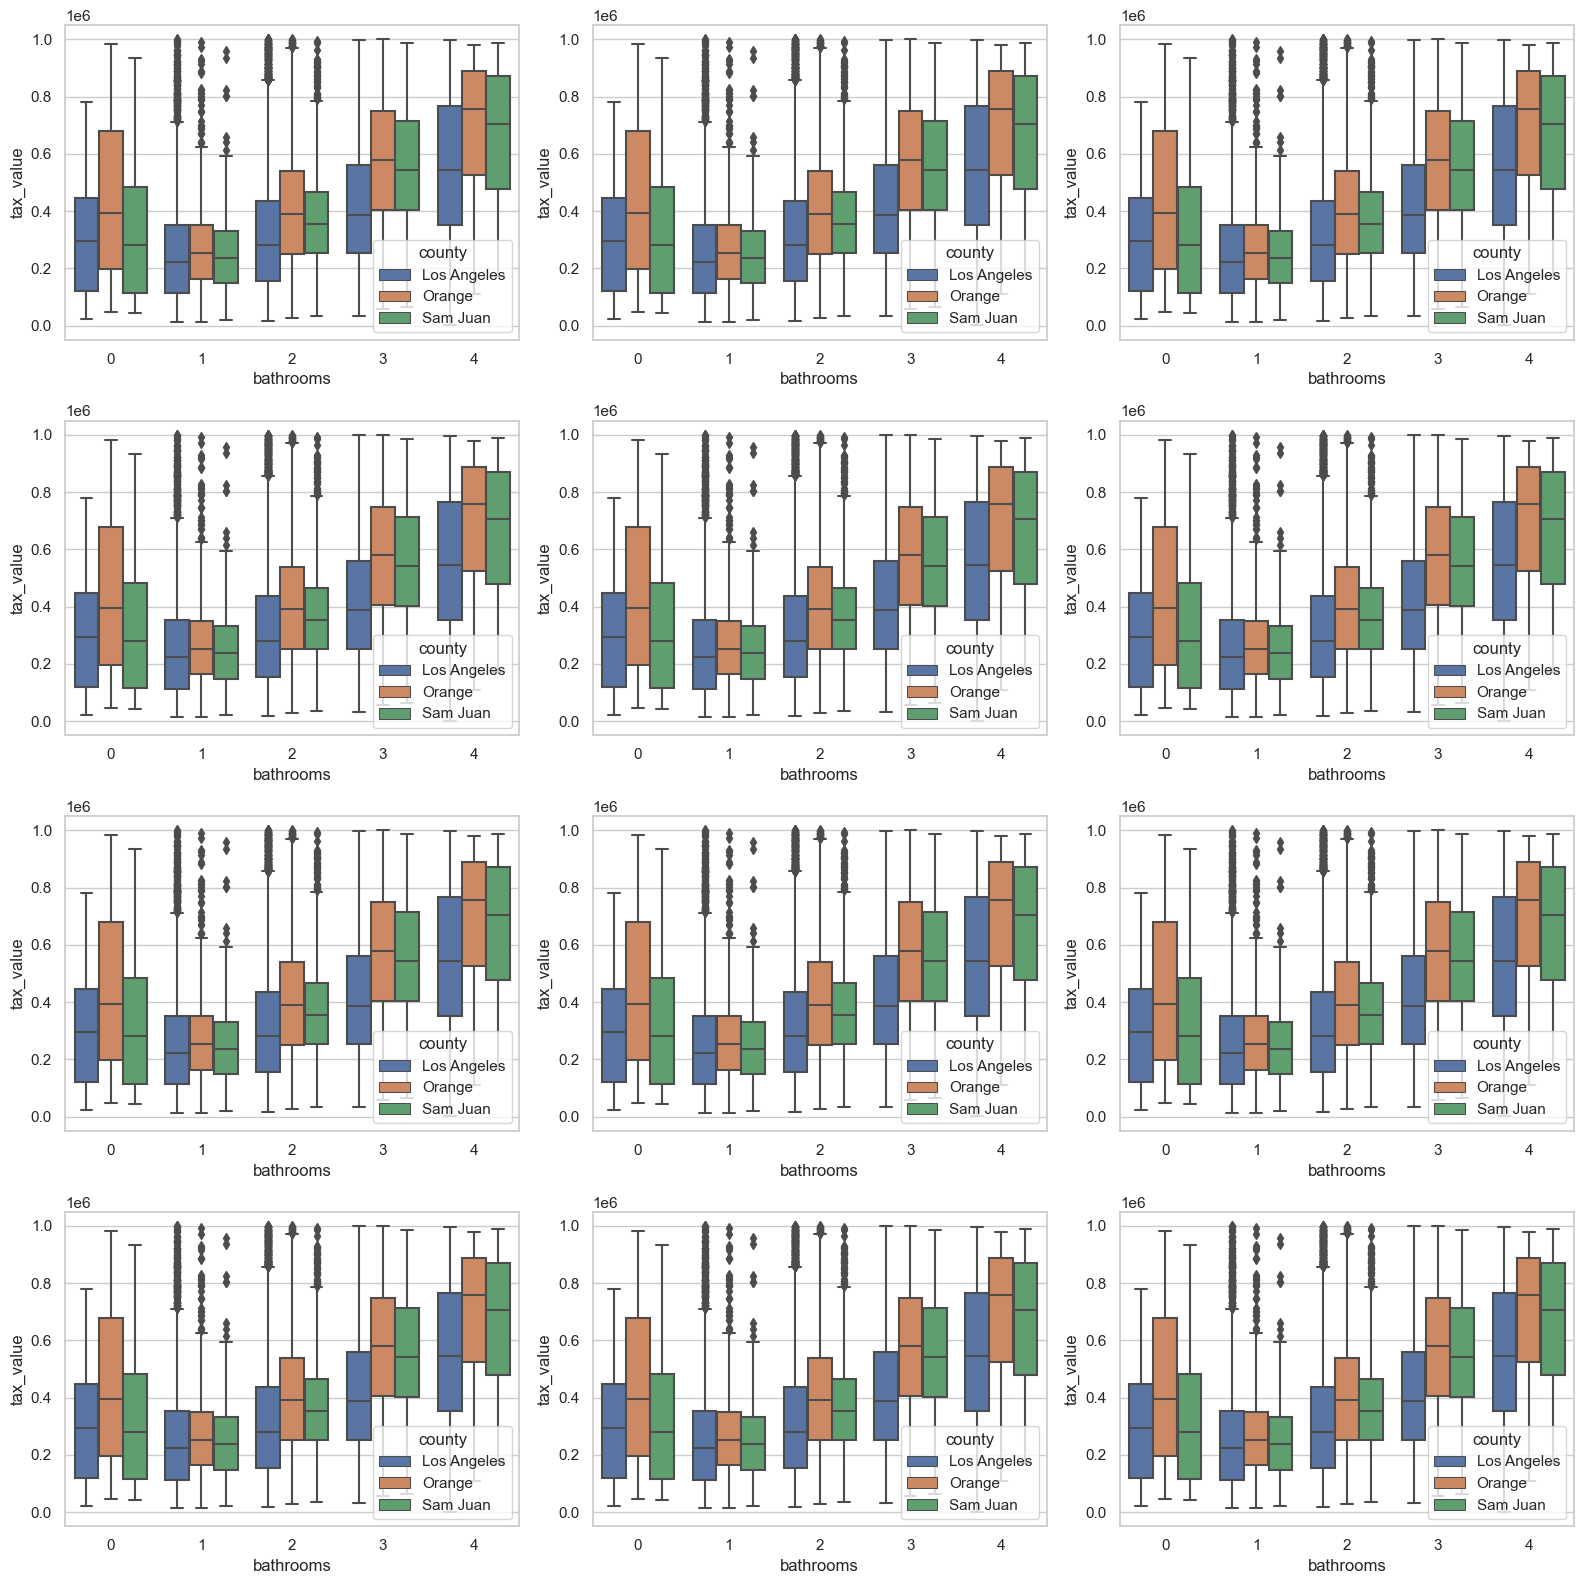

In [51]:
from math import ceil

# fixed number of columns
num_cols = 3
num_rows = ceil(len(categorical_col) / cols)

# Create the figure and axes objects
fig = plt.figure(figsize=(16, 16))

# Loop through the subplots and plot on each one
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    
    # Filter the data for the current subplot
#     subset = data[data['Hue'] == f'Group {i+1}']
    sns.boxplot(data=train, x='bathrooms', y='tax_value', hue='county', ax=ax)
#     ax.set_title(f'Group {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [40]:
categorical_col

['bathrooms',
 'bedrooms',
 'county',
 'fullbathcnt',
 'propertycountylandusecode',
 'regionidcounty',
 'roomcnt',
 'unitcnt',
 'assessmentyear',
 'transactiondate',
 'propertylandusedesc']

A large number of properties is found in the Los Angeles county and it looks like the more bedrooms and/or bathrooms are in a house, the more more the house is worth.